# Credit EDA - Case Study

#### Introduction

This case study aims to give you an idea of applying EDA in a real business scenario. In this case study, apart from applying the techniques that you have learnt in the EDA module, you will also develop a basic understanding of risk analytics in banking and financial services and understand how data is used to minimise the risk of losing money while lending to customers.

 

#### Business Understanding

The loan providing companies find it hard to give loans to the people due to their insufficient or non-existent credit history. Because of that, some consumers use it as their advantage by becoming a defaulter. Suppose you work for a consumer finance company which specialises in lending various types of loans to urban customers. You have to use EDA to analyse the patterns present in the data. This will ensure that the applicants capable of repaying the loan are not rejected.

When the company receives a loan application, the company has to decide for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

 - If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company
 - If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company.

The data given below contains the information about the loan application at the time of applying for the loan. It contains two types of scenarios:

 - **The client with payment difficulties:** he/she had late payment more than X days on at least one of the first Y instalments of the loan in our sample,

 - **All other cases:** All other cases when the payment is paid on time.


When a client applies for a loan, there are four types of decisions that could be taken by the client/company):

 - **Approved:** The Company has approved loan Application
 - **Cancelled:** The client cancelled the application sometime during approval. Either the client changed her/his mind about the loan or in some cases due to a higher risk of the client he received worse pricing which he did not want.
 - **Refused:** The company had rejected the loan (because the client does not meet their requirements etc.).
 - **Unused offer:**  Loan has been cancelled by the client but on different stages of the process.

In this case study, you will use EDA to understand how consumer attributes and loan attributes influence the tendency of default.


#### Business Objectives

This case study aims to identify patterns which indicate if a client has difficulty paying their installments which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc. This will ensure that the consumers capable of repaying the loan are not rejected. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the driving factors (or driver variables) behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.

To develop your understanding of the domain, you are advised to independently research a little about risk analytics - understanding the types of variables and their significance should be enough).


#### Data Understanding

This dataset has 3 files as explained below: 

 

1. *'application_data.csv'* contains all the information of the client at the time of application.
The data is about whether a client has payment difficulties.

2. *'previous_application.csv'* contains information about the client’s previous loan data. It contains the data whether the previous application had been Approved, Cancelled, Refused or Unused offer.

3. *'columns_description.csv'* is data dictionary which describes the meaning of the variables.

---

#### Results Expected by Learners

 - Present the overall approach of the analysis in a presentation. Mention the problem statement and the analysis approach briefly.
 - Identify the missing data and use appropriate method to deal with it. (Remove columns/or replace it with an appropriate value)

**Hint:** Note that in EDA, since it is not necessary to replace the missing value, but if you have to replace the missing value, what should be the approach. Clearly mention the approach.

 - Identify if there are outliers in the dataset. Also, mention why do you think it is an outlier. Again, remember that for this exercise, it is not necessary to remove any data points.
 - Identify if there is data imbalance in the data. Find the ratio of data imbalance.

**Hint:** How will you analyse the data in case of data imbalance? You can plot more than one type of plot to analyse the different aspects due to data imbalance. For example, you can choose your own scale for the graphs, i.e. one can plot in terms of percentage or absolute value. Do this analysis for the **‘Target variable’** in the dataset (**clients with payment difficulties** and **all other cases**). Use a mix of univariate and bivariate analysis etc.

**Hint:** Since there are a lot of columns, you can run your analysis in loops for the appropriate columns and find the insights.

 - Explain the results of univariate, segmented univariate, bivariate analysis, etc. in business terms.
 - Find the top 10 correlation for the **Client with payment difficulties** and **all other cases** (Target variable). Note that you have to find the top correlation by segmenting the data frame w.r.t to the target variable and then find the top correlation for each of the segmented data and find if any insight is there.  Say, there are 5+1(target) variables in a dataset: **Var1, Var2, Var3, Var4, Var5, Target**. And if you have to find top 3 correlation, it can be: Var1 & Var2, Var2 & Var3, Var1 & Var3. Target variable will not feature in this correlation as it is a categorical variable and not a continuous variable which is increasing or decreasing.
 - Include visualisations and summarise the most important results in the presentation. You are free to choose the graphs which explain the numerical/categorical variables. Insights should explain why the variable is important for differentiating the **clients with payment difficulties with all other cases.** 

---

### 1. Importing Libraries

In [1]:
# Filtering out the warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the required libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import plotly
import plotly.express as px
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 200)

### 2. Read the datasets

In [3]:
# read the application_data in app_data
app_data = pd.read_csv("application_data.csv")
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [4]:
# read the previous application data in prev_data
prev_data = pd.read_csv("previous_application.csv")
prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

##### 2.1 Inspect Application data

In [5]:
# Check the number of rows and columns in the dataframe
app_data.shape

(307511, 122)

In [6]:
# Check the column-wise info of the dataframe
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [7]:
# Check the summary for the numeric columns
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

Since there are a lot of columns (122) in the "application dataset" and considering the fact that not much analysis would be done on whether Document 2 to 21 were submitted at this stage, we can remove theese columns (ignore from analysis). Similaryly, for normalized details about the building (_AVG, _MODE, _MEDI) columns.

 - "FLAG_DOCUMENT_2 to FLAG_DOCUMENT_21" columns will be dropped from this analysis.
 - Normalized information about the building columns (_AVG, _MODE, _MEDI) will be dropped from analysis. (These columns have higher NaN values as well)

In [8]:
# list of columns that can be dropped
cols = []
for c in app_data.columns:
    if c.startswith('FLAG_DOCUMENT') or c.endswith('_AVG') or c.endswith('_MODE') or c.endswith('_MEDI'):
        cols.append(c)

app_data[cols]

APARTMENTS_AVG  BASEMENTAREA_AVG  YEARS_BEGINEXPLUATATION_AVG  \
0               0.0247            0.0369                       0.9722   
1               0.0959            0.0529                       0.9851   
2                  NaN               NaN                          NaN   
3                  NaN               NaN                          NaN   
4                  NaN               NaN                          NaN   
...                ...               ...                          ...   
307506          0.2021            0.0887                       0.9876   
307507          0.0247            0.0435                       0.9727   
307508          0.1031            0.0862                       0.9816   
307509          0.0124               NaN                       0.9771   
307510          0.0742            0.0526                       0.9881   

        YEARS_BUILD_AVG  COMMONAREA_AVG  ELEVATORS_AVG  ENTRANCES_AVG  \
0                0.6192          0.0143           0.00         0.0690   
1                0.7960          0.0605           0.08         0.0345   
2                   NaN             NaN            NaN            NaN   
3                   NaN             NaN            NaN            NaN   
4                   NaN             NaN            NaN            NaN   
...                 ...             ...            ...            ...   
307506           0.8300          0.0202           0.22         0.1034   
307507           0.6260          0.0022           0.00         0.1034   
307508           0.7484          0.0123           0.00         0.2069   
307509              NaN             NaN            NaN         0.0690   
307510              NaN          0.0176           0.08         0.0690   

        FLOORSMAX_AVG  FLOORSMIN_AVG  LANDAREA_AVG  LIVINGAPARTMENTS_AVG  \
0              0.0833         0.1250        0.0369                0.0202   
1              0.2917         0.3333        0.0130                0.0773   
2                 NaN            NaN           NaN                   NaN   
3                 NaN            NaN           NaN                   NaN   
4                 NaN            NaN           NaN                   NaN   
...               ...            ...           ...                   ...   
307506         0.6042         0.2708        0.0594                0.1484   
307507         0.0833         0.1250        0.0579                0.0202   
307508         0.1667         0.2083           NaN                0.0841   
307509         0.0417            NaN           NaN                   NaN   
307510         0.3750            NaN           NaN                   NaN   

        LIVINGAREA_AVG  NONLIVINGAPARTMENTS_AVG  NONLIVINGAREA_AVG  \
0               0.0190                   0.0000             0.0000   
1               0.0549                   0.0039             0.0098   
2                  NaN                      NaN                NaN   
3                  NaN                      NaN                NaN   
4                  NaN                      NaN                NaN   
...                ...                      ...                ...   
307506          0.1965                   0.0753             0.1095   
307507          0.0257                   0.0000             0.0000   
307508          0.9279                   0.0000             0.0000   
307509          0.0061                      NaN                NaN   
307510          0.0791                      NaN             0.0000   

        APARTMENTS_MODE  BASEMENTAREA_MODE  YEARS_BEGINEXPLUATATION_MODE  \
0                0.0252             0.0383                        0.9722   
1                0.0924             0.0538                        0.9851   
2                   NaN                NaN                           NaN   
3                   NaN                NaN                           NaN   
4                   NaN                NaN                           NaN   
...                 ...                ...  

In [9]:
# check before dropping the columns
app_data.drop(labels=cols, axis=1)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [10]:
# drop the columns not required for analysis
app_data.drop(labels=cols, axis=1, inplace=True)
app_data

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [11]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 55 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [12]:
app_data.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

##### 2.2 Inspect Previous Application data

In [13]:
# Check the number of rows and columns in the dataframe
prev_data.shape

(1670214, 37)

In [14]:
# Check the column-wise info of the dataframe
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [15]:
# Check the summary for the numeric columns
prev_data.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

### 3. Handling Missing Values

#### 3.1 Removing columns with high missing value percentage

##### 3.1.1 Application data

In [16]:
# count of missing values in each column
app_data.isnull().sum().sort_values(ascending=False).head(20)

OWN_CAR_AGE                   202929
EXT_SOURCE_1                  173378
OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
NAME_TYPE_SUITE                 1292
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
dtype: int64

In [17]:
# percentage of null values in each column
(100* app_data.isnull().sum() / len(app_data)).round(4).sort_values(ascending=False).head(20)

OWN_CAR_AGE                   65.9908
EXT_SOURCE_1                  56.3811
OCCUPATION_TYPE               31.3455
EXT_SOURCE_3                  19.8253
AMT_REQ_CREDIT_BUREAU_YEAR    13.5016
AMT_REQ_CREDIT_BUREAU_MON     13.5016
AMT_REQ_CREDIT_BUREAU_WEEK    13.5016
AMT_REQ_CREDIT_BUREAU_DAY     13.5016
AMT_REQ_CREDIT_BUREAU_HOUR    13.5016
AMT_REQ_CREDIT_BUREAU_QRT     13.5016
NAME_TYPE_SUITE                0.4201
OBS_30_CNT_SOCIAL_CIRCLE       0.3320
DEF_30_CNT_SOCIAL_CIRCLE       0.3320
OBS_60_CNT_SOCIAL_CIRCLE       0.3320
DEF_60_CNT_SOCIAL_CIRCLE       0.3320
EXT_SOURCE_2                   0.2146
AMT_GOODS_PRICE                0.0904
AMT_ANNUITY                    0.0039
CNT_FAM_MEMBERS                0.0007
DAYS_LAST_PHONE_CHANGE         0.0003
dtype: float64

Dropping columns from Application data where missing values are more than 45% (except EXT_SOURCE_1, as it might be useful)

In [18]:
# Columns with NaN percentage >= 45
null_cols = (100 * app_data.isnull().sum() / len(app_data))
null_cols = null_cols[(null_cols.values >= 45) & (null_cols.index != 'EXT_SOURCE_1')]
null_cols

OWN_CAR_AGE    65.99081
dtype: float64

In [19]:
# check before dropping the columns
app_data.drop(labels=list(null_cols.index), axis=1)

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                    Y             0          202500.0    406597.5   
1                    N             0          270000.0   1293502.5   
2                    Y             0           67500.0    135000.0   
3                    Y             0          135000.0    312682.5   
4                    Y             0          121500.0    513000.0   
...                ...           ...               ...         ...   
307506               N             0          157500.0    254700.0   
307507               Y             0           72000.0    269550.0   
307508               Y             0          153000.0    677664.0   
307509               Y             0          171000.0    370107.0   
307510               N             0          157500.0    675000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
0           24700.5         351000.0   Unaccompanied               Working   
1           35698.5        1129500.0          Family         State servant   
2            6750.0         135000.0   Unaccompanied               Working   
3           29686.5         297000.0   Unaccompanied               Working   
4           21865.5         513000.0   Unaccompanied               Working   
...             ...              ...             ...                   ...   
307506      27558.0         225000.0   Unaccompanied               Working   
307507      12001.5         225000.0   Unaccompanied             Pensioner   
307508      29979.0         585000.0   Unaccompanied               Working   
307509      20205.0         319500.0   Unaccompanied  Commercial associate   
307510      49117.5         675000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
0       Secondary / secondary special  Single / not married   
1                    Higher education               Married   
2       Secondary / secondary special  Single / not married   
3       Secondary / secondary special        Civil marriage   
4       Secondary / secondary special  Single / not married   
...                               ...                   ...   
307506  Secondary / secondary special             Separated   
307507  Secondary / secondary special                 Widow   
307508               Higher education             Separated   
307509  Secondary / secondary special               Married   
307510               Higher education               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
0       House / apartment                    0.018801       -9461   
1       House / apartment                    0.003541      -16765   
2       House / apartment                    0.010032      -19046   
3       House / apartment                    0.008019      -19005   
4       House / apartment                    0.028663      -19932   
...                   ...                         ...         ...   
307506       With parents                    0.032561       -9327   
307507  House / apartment       

In [20]:
# dropping of the NaN columns (>45% missing)
app_data.drop(labels=list(null_cols.index), axis=1, inplace=True)

In [21]:
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120           1               1                0   
1             -291           1               1                0   
2            -2531           1               1                1   
3            -2437           1               1                0   
4            -3458           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0             

##### 3.1.2 Previous Application data

In [22]:
# count of missing values in each column
prev_data.isnull().sum().sort_values(ascending=False).head(20)

RATE_INTEREST_PRIVILEGED      1664263
RATE_INTEREST_PRIMARY         1664263
RATE_DOWN_PAYMENT              895844
AMT_DOWN_PAYMENT               895844
NAME_TYPE_SUITE                820405
DAYS_TERMINATION               673065
NFLAG_INSURED_ON_APPROVAL      673065
DAYS_FIRST_DRAWING             673065
DAYS_FIRST_DUE                 673065
DAYS_LAST_DUE_1ST_VERSION      673065
DAYS_LAST_DUE                  673065
AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
dtype: int64

In [23]:
# percentage of null values in each column
(100 * prev_data.isnull().sum() / len(prev_data)).round(4).sort_values(ascending=False).head(20)

RATE_INTEREST_PRIVILEGED      99.6437
RATE_INTEREST_PRIMARY         99.6437
RATE_DOWN_PAYMENT             53.6365
AMT_DOWN_PAYMENT              53.6365
NAME_TYPE_SUITE               49.1198
DAYS_TERMINATION              40.2981
NFLAG_INSURED_ON_APPROVAL     40.2981
DAYS_FIRST_DRAWING            40.2981
DAYS_FIRST_DUE                40.2981
DAYS_LAST_DUE_1ST_VERSION     40.2981
DAYS_LAST_DUE                 40.2981
AMT_GOODS_PRICE               23.0818
AMT_ANNUITY                   22.2867
CNT_PAYMENT                   22.2864
PRODUCT_COMBINATION            0.0207
AMT_CREDIT                     0.0001
SK_ID_CURR                     0.0000
NAME_CONTRACT_TYPE             0.0000
WEEKDAY_APPR_PROCESS_START     0.0000
HOUR_APPR_PROCESS_START        0.0000
dtype: float64

Dropping columns from Previous Application data where missing data is more than 50%

In [24]:
# Columns with missing value percentage >= 50
null_cols = ( 100 * prev_data.isnull().sum() / len(prev_data) )
null_cols = null_cols[null_cols.values >= 50]
null_cols

AMT_DOWN_PAYMENT            53.636480
RATE_DOWN_PAYMENT           53.636480
RATE_INTEREST_PRIMARY       99.643698
RATE_INTEREST_PRIVILEGED    99.643698
dtype: float64

In [25]:
# check before dropping the columns
prev_data.drop(labels=(list(null_cols.index)), axis=1)

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE  \
0                17145.0     17145.0          17145.0   
1               607500.0    679671.0         607500.0   
2               112500.0    136444.5         112500.0   
3               450000.0    470790.0         450000.0   
4               337500.0    404055.0         337500.0   
...                  ...         ...              ...   
1670209         267295.5    311400.0         267295.5   
1670210          87750.0     64291.5          87750.0   
1670211         105237.0    102523.5         105237.0   
1670212         180000.0    191880.0         180000.0   
1670213         360000.0    360000.0         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

        NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  DAYS_DECISION  \
0                          XAP             Approved            -73   
1                          XNA             Approved           -164   
2                          XNA             Approved           -301   
3                          XNA             Approved           -512   
4                      Repairs              Refused           -781   
...                        ...                  ...            ...   
1670209                    XAP             Approved           -544   
1670210                    XAP             Approved          -1694   
1670211                    XAP             Approved          -1488   
1670212                    XNA             Approved          -1185   
1670213                    XNA             Approved          -1193   

             NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0        Cash through the bank                XAP              NaN   
1                       

In [26]:
# dropping of Columns having missing records >=50%
prev_data.drop(labels=(list(null_cols.index)), axis=1, inplace=True)

In [27]:
prev_data.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0          17145.0                   SATURDAY   
1    679671.0         607500.0                   THURSDAY   
2    136444.5         112500.0                    TUESDAY   
3    470790.0         450000.0                     MONDAY   
4    404055.0         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XNA             Approved   
3                       1                    XNA             Approved   
4                       1                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
0           -42.0                      300.0          -42.0             -37.0   
1          -134.0                      916.0       365243.0          365243.0   
2          -271.0                       59.0       365243.0          365243.0   
3          -482.0                     -152.0         -182.0            -177.0   
4             NaN                        NaN            NaN               NaN   

   NFLAG_INSURED_ON_APPROVAL  
0                        0.0  
1 

#### 3.2 Imputing Missing Values

##### 3.2.1 Application Data

In [28]:
# checking for Null values in remaining columns
app_data.isnull().sum().sort_values(ascending=False).head(20)

EXT_SOURCE_1                  173378
OCCUPATION_TYPE                96391
EXT_SOURCE_3                   60965
AMT_REQ_CREDIT_BUREAU_YEAR     41519
AMT_REQ_CREDIT_BUREAU_QRT      41519
AMT_REQ_CREDIT_BUREAU_MON      41519
AMT_REQ_CREDIT_BUREAU_WEEK     41519
AMT_REQ_CREDIT_BUREAU_DAY      41519
AMT_REQ_CREDIT_BUREAU_HOUR     41519
NAME_TYPE_SUITE                 1292
DEF_60_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
NAME_HOUSING_TYPE                  0
dtype: int64

_Column_ : **"OCCUPATION_TYPE"**

 1. Impute missing values with Mode of the data - "Laborers". As the count of missing values is very high (>30%), imputing these values would skew the data.
 2. Remove the missing records. As there are over 30% missing records, deleting them would impact the analysis as we might delete a large dataset which could have other column that might be useful.
 3. Fill the Missing with a Constant value - 'N/A' or 'Others' depending on the dataset.
 4. Ignore the missing values, and carry on with further analysis of data.

We would prefer to impute the data with a Constant value.

In [29]:
app_data['OCCUPATION_TYPE'].value_counts(normalize=True)

Laborers                 0.261396
Sales staff              0.152056
Core staff               0.130589
Managers                 0.101227
Drivers                  0.088116
High skill tech staff    0.053903
Accountants              0.046481
Medicine staff           0.040437
Security staff           0.031835
Cooking staff            0.028164
Cleaning staff           0.022040
Private service staff    0.012562
Low-skill Laborers       0.009914
Waiters/barmen staff     0.006385
Secretaries              0.006181
Realty agents            0.003557
HR staff                 0.002667
IT staff                 0.002491
Name: OCCUPATION_TYPE, dtype: float64

In [30]:
# finding the unique value available for "Occupation_Type"
app_data['OCCUPATION_TYPE'].unique()

array(['Laborers', 'Core staff', 'Accountants', 'Managers', nan,
       'Drivers', 'Sales staff', 'Cleaning staff', 'Cooking staff',
       'Private service staff', 'Medicine staff', 'Security staff',
       'High skill tech staff', 'Waiters/barmen staff',
       'Low-skill Laborers', 'Realty agents', 'Secretaries', 'IT staff',
       'HR staff'], dtype=object)

In [31]:
# as 'Others' value is not already present in the data. We can go ahead and impute the Missing records with 'Others'
app_data['OCCUPATION_TYPE'].fillna('Others')

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507         Others
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object

In [32]:
app_data['OCCUPATION_TYPE'].fillna('Others', inplace=True)
app_data['OCCUPATION_TYPE'].isnull().sum()

0

In [33]:
app_data['OCCUPATION_TYPE'].value_counts(normalize=True)

Others                   0.313455
Laborers                 0.179460
Sales staff              0.104393
Core staff               0.089655
Managers                 0.069497
Drivers                  0.060495
High skill tech staff    0.037007
Accountants              0.031911
Medicine staff           0.027762
Security staff           0.021856
Cooking staff            0.019336
Cleaning staff           0.015131
Private service staff    0.008624
Low-skill Laborers       0.006806
Waiters/barmen staff     0.004384
Secretaries              0.004244
Realty agents            0.002442
HR staff                 0.001831
IT staff                 0.001711
Name: OCCUPATION_TYPE, dtype: float64

_Columns_ : **"EXT_SOURCE_1", "EXT_SOURCE_2", and "EXT_SOURCE_3"**

These columns are External data sources (Normalized Score for Applicant) and imputing these values might skew the data, as we do not know the exact logic to calculate these scores. We can ignore the Missing records and continue with the analysis

_Columns_ : **"AMT_REQ_CREDIT_BUREAU_HOUR", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_QRT", and "AMT_REQ_CREDIT_BUREAU_YEAR"**

These columns hold information about Number of enquiries to Credit Bureau about the Client on given Intervals. We can assume if there are Missing values, it means No enquiry was made. So we can impute the missing records with 0 (which is mode of the data as well).

In [34]:
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].value_counts(normalize=True)

0.0    0.993887
1.0    0.005865
2.0    0.000211
3.0    0.000034
4.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [35]:
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].value_counts(normalize=True)

0.0    0.994402
1.0    0.004857
2.0    0.000399
3.0    0.000169
4.0    0.000098
5.0    0.000034
6.0    0.000030
9.0    0.000008
8.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [36]:
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].value_counts(normalize=True)

0.0    0.967909
1.0    0.030858
2.0    0.000748
3.0    0.000218
4.0    0.000128
6.0    0.000075
5.0    0.000038
8.0    0.000019
7.0    0.000008
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [37]:
app_data['AMT_REQ_CREDIT_BUREAU_MON'].value_counts(normalize=True)

0.0     0.835488
1.0     0.124617
2.0     0.020249
3.0     0.007485
4.0     0.004045
5.0     0.002263
6.0     0.001290
7.0     0.001120
9.0     0.000774
8.0     0.000696
10.0    0.000496
11.0    0.000447
12.0    0.000289
13.0    0.000271
14.0    0.000150
15.0    0.000132
16.0    0.000086
17.0    0.000053
18.0    0.000023
19.0    0.000011
24.0    0.000004
27.0    0.000004
22.0    0.000004
23.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [38]:
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].value_counts(normalize=True)

0.0      0.809863
1.0      0.127305
2.0      0.054182
3.0      0.006455
4.0      0.001790
5.0      0.000241
6.0      0.000105
7.0      0.000026
8.0      0.000026
19.0     0.000004
261.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

In [39]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].value_counts(normalize=True)

0.0     0.269937
1.0     0.238372
2.0     0.188697
3.0     0.126425
4.0     0.077875
5.0     0.045310
6.0     0.026193
7.0     0.014546
8.0     0.007996
9.0     0.004120
11.0    0.000117
12.0    0.000113
10.0    0.000083
13.0    0.000071
14.0    0.000038
17.0    0.000026
15.0    0.000023
19.0    0.000015
18.0    0.000015
16.0    0.000011
21.0    0.000004
23.0    0.000004
25.0    0.000004
20.0    0.000004
22.0    0.000004
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

Percentage of '0.0' is higher in all the 'AMT_REQ_CREDIT_BUREAU_' columns, we can impute these missing records with mode of the data (0.0)

In [40]:
print(app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode())
print(app_data['AMT_REQ_CREDIT_BUREAU_MON'].mode())
print(app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode())
print(app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode())
print(app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode())
print(app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode())

0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64
0    0.0
dtype: float64


*Imputing the 'AMT_REQ_CREDIT_BUREAU_' columns using mode value*

In [41]:
year_mode = app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].mode()[0]
mon_mode = app_data['AMT_REQ_CREDIT_BUREAU_MON'].mode()[0]
qrt_mode = app_data['AMT_REQ_CREDIT_BUREAU_QRT'].mode()[0]
week_mode = app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].mode()[0]
day_mode = app_data['AMT_REQ_CREDIT_BUREAU_DAY'].mode()[0]
hour_mode = app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].mode()[0]

In [42]:
app_data['AMT_REQ_CREDIT_BUREAU_YEAR'].fillna(year_mode, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_MON'].fillna(mon_mode, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_QRT'].fillna(qrt_mode, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_WEEK'].fillna(week_mode, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_DAY'].fillna(day_mode, inplace=True)
app_data['AMT_REQ_CREDIT_BUREAU_HOUR'].fillna(hour_mode, inplace=True)

In [43]:
app_data[['AMT_REQ_CREDIT_BUREAU_YEAR', 'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_WEEK', 'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_HOUR', 'AMT_REQ_CREDIT_BUREAU_QRT']].isnull().sum()

AMT_REQ_CREDIT_BUREAU_YEAR    0
AMT_REQ_CREDIT_BUREAU_MON     0
AMT_REQ_CREDIT_BUREAU_WEEK    0
AMT_REQ_CREDIT_BUREAU_DAY     0
AMT_REQ_CREDIT_BUREAU_HOUR    0
AMT_REQ_CREDIT_BUREAU_QRT     0
dtype: int64

In [44]:
# checking the missing columns again
app_data.isnull().sum().sort_values(ascending=False).head(15)

EXT_SOURCE_1                  173378
EXT_SOURCE_3                   60965
NAME_TYPE_SUITE                 1292
DEF_60_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
OBS_30_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
REGION_POPULATION_RELATIVE         0
DAYS_BIRTH                         0
NAME_INCOME_TYPE                   0
dtype: int64

_Column_ : **"NAME_TYPE_SUITE"**

This column gives details about Co-Applicants. We can assume if there are missing values, it means there is no Co-applicant.

In [45]:
app_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      248526
Family              40149
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: NAME_TYPE_SUITE, dtype: int64

In [46]:
app_data['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.811596
Family             0.131112
Spouse, partner    0.037130
Children           0.010669
Other_B            0.005780
Other_A            0.002828
Group of people    0.000885
Name: NAME_TYPE_SUITE, dtype: float64

As 81% of "NAME_TYPE_SUITE" values is "Unaccompanied". We can use this value to impute the Missing records.

In [47]:
nts_mode = app_data.NAME_TYPE_SUITE.mode()[0]
app_data['NAME_TYPE_SUITE'].fillna(nts_mode, inplace=True)

In [48]:
app_data['NAME_TYPE_SUITE'].isnull().sum()

0

_Columns_ : **"OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE"** can be ignored as they are not required for this analysis

_Column_ : **"AMT_GOODS_PRICE"**

This column gives information abou the Price of the Goods on which loan is given.
 1. As the missing value count is low, we can delete the rows which has missing records
 2. As this is a continuous data, We can impute the missing values with Mean or Median of the dataset

In [49]:
app_data['AMT_GOODS_PRICE'].describe()

count    3.072330e+05
mean     5.383962e+05
std      3.694465e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64

In [50]:
app_data['AMT_GOODS_PRICE'].value_counts()

450000.0    26022
225000.0    25282
675000.0    24962
900000.0    15416
270000.0    11428
            ...  
705892.5        1
442062.0        1
353641.5        1
353749.5        1
738945.0        1
Name: AMT_GOODS_PRICE, Length: 1002, dtype: int64

In [51]:
# sns.distplot(app_data['AMT_GOODS_PRICE'])
# plt.show()

_Column_ : **"AMT_ANNUNITY"**

This column gives information about Loan Annuity.
 1. As the missing value count is low, we can delete the rows which has missing records
 2. As this is a continuous data, We can impute the missing values with Mean or Median of the dataset

In [52]:
app_data['AMT_ANNUITY'].describe()

count    307499.000000
mean      27108.573909
std       14493.737315
min        1615.500000
25%       16524.000000
50%       24903.000000
75%       34596.000000
max      258025.500000
Name: AMT_ANNUITY, dtype: float64

In [53]:
# sns.distplot(app_data['AMT_ANNUITY'])
# plt.show()

In [54]:
app_data.isnull().sum().sort_values(ascending=False).head(12)

EXT_SOURCE_1                  173378
EXT_SOURCE_3                   60965
OBS_30_CNT_SOCIAL_CIRCLE        1021
DEF_60_CNT_SOCIAL_CIRCLE        1021
DEF_30_CNT_SOCIAL_CIRCLE        1021
OBS_60_CNT_SOCIAL_CIRCLE        1021
EXT_SOURCE_2                     660
AMT_GOODS_PRICE                  278
AMT_ANNUITY                       12
CNT_FAM_MEMBERS                    2
DAYS_LAST_PHONE_CHANGE             1
REGION_POPULATION_RELATIVE         0
dtype: int64

_Columns_ : **"CNT_FAM_MEMBERS" and "DAYS_LAST_PHONE_CHANGE"**

 1. These columns have only 1 or 2 missing records. We can completely delete these rows
 2. Impute these records with Mode of the dataset.

##### 3.2.2 Previous Application Data

In [55]:
prev_data.isnull().sum().sort_values(ascending=False).head(20)

NAME_TYPE_SUITE                820405
DAYS_FIRST_DUE                 673065
DAYS_TERMINATION               673065
DAYS_FIRST_DRAWING             673065
NFLAG_INSURED_ON_APPROVAL      673065
DAYS_LAST_DUE_1ST_VERSION      673065
DAYS_LAST_DUE                  673065
AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
NAME_CASH_LOAN_PURPOSE              0
SK_ID_CURR                          0
NAME_CONTRACT_TYPE                  0
AMT_APPLICATION                     0
WEEKDAY_APPR_PROCESS_START          0
HOUR_APPR_PROCESS_START             0
FLAG_LAST_APPL_PER_CONTRACT         0
NFLAG_LAST_APPL_IN_DAY              0
dtype: int64

_Column_ : **"NAME_TYPE_SUITE"**

This column gives details about Co-Applicants. We can assume if there are missing values, it means there is no Co-applicant.

In [56]:
prev_data['NAME_TYPE_SUITE'].value_counts()

Unaccompanied      508970
Family             213263
Spouse, partner     67069
Children            31566
Other_B             17624
Other_A              9077
Group of people      2240
Name: NAME_TYPE_SUITE, dtype: int64

In [57]:
prev_data['NAME_TYPE_SUITE'].value_counts(normalize=True)

Unaccompanied      0.598923
Family             0.250954
Spouse, partner    0.078922
Children           0.037145
Other_B            0.020739
Other_A            0.010681
Group of people    0.002636
Name: NAME_TYPE_SUITE, dtype: float64

As 60% of "NAME_TYPE_SUITE" values is "Unaccompanied". We can use this value to impute the Missing records.

In [58]:
nts_mode = prev_data.NAME_TYPE_SUITE.mode()[0]
prev_data['NAME_TYPE_SUITE'].fillna(nts_mode, inplace=True)

In [59]:
prev_data['NAME_TYPE_SUITE'].isnull().sum()

0

Most of the columns having missing values are Continuous values.
1. We can either impute those with Mean or Median of the data

Skipping the impuation for this analysis.

---

### 4. Handling Outliers & Inconsistent Data

##### 4.1 Application Data

In [60]:
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              307511 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

**Checking columns with float datatype**

In [61]:
app_data.select_dtypes('float64').columns

Index(['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
       'REGION_POPULATION_RELATIVE', 'DAYS_REGISTRATION', 'CNT_FAM_MEMBERS',
       'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'DAYS_LAST_PHONE_CHANGE', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object')

_Column_ : **"CNT_FAM_MEMBERS"**

This column gives details of Applicant's Family Members - which can be converted to Integer. The two missing records can be updated to mode of the dataset.

In [62]:
# imputing "CNT_FAM_MEMBERS" with mode
app_data['CNT_FAM_MEMBERS'].fillna(app_data.CNT_FAM_MEMBERS.mode()[0], inplace=True)

In [63]:
# converting the datatype to integer
app_data['CNT_FAM_MEMBERS'] = app_data['CNT_FAM_MEMBERS'].astype('int64')

_Column_ : **"DAYS_REGISTRATION"**

This column has Negative data, and all the data is in Days. We can convert this column into Years (Integer format)

In [64]:
app_data['DAYS_REGISTRATION'].unique()

array([ -3648.,  -1186.,  -4260., ..., -16396., -14558., -14798.])

In [65]:
# converting "DAYS_REGISTRATION" data to years (& positive values)
app_data['DAYS_REGISTRATION'] = (app_data['DAYS_REGISTRATION'] / -365).astype('int64')
app_data['DAYS_REGISTRATION'].value_counts()

0     16857
1     15575
2     14998
3     12993
12    12958
11    12577
13    12419
7     11695
8     11278
4     11142
6     11030
10    10681
9     10510
5     10105
14    10059
16     8749
15     8656
17     8413
19     8186
18     7964
20     7599
22     7517
21     7364
23     7138
24     6889
25     6310
26     5886
27     5185
28     4226
29     3494
30     2919
31     2559
32     2329
33     2157
34     1951
35     1632
36     1387
37     1023
38      805
39      563
40      465
41      359
42      256
43      193
44      128
45       87
46       60
47       48
48       31
49       26
50       16
52       11
53       11
51       10
56       10
57        5
62        3
54        2
55        2
58        2
59        2
61        2
64        1
65        1
60        1
67        1
Name: DAYS_REGISTRATION, dtype: int64

_Column_ : **"DAYS_LAST_PHONE_CHANGE"**

This column has Negative data, and all the data is in Days. We can convert this column into Years (Integer format)

In [66]:
app_data['DAYS_LAST_PHONE_CHANGE'].unique()

array([-1134.,  -828.,  -815., ..., -3988., -3899., -3538.])

In [67]:
# converting "DAYS_LAST_PHONE_CHANGE" data to years (& positive values)
app_data['DAYS_LAST_PHONE_CHANGE'].fillna(app_data['DAYS_LAST_PHONE_CHANGE'].mode()[0], inplace=True)
app_data['DAYS_LAST_PHONE_CHANGE'].value_counts()

 0.0       37673
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-3558.0        1
-3978.0        1
-3701.0        1
-3809.0        1
-3731.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64

In [68]:
app_data['DAYS_LAST_PHONE_CHANGE'] = (app_data['DAYS_LAST_PHONE_CHANGE'] / -365).astype('int64')
app_data['DAYS_LAST_PHONE_CHANGE'].value_counts()

0     92452
1     57641
4     38061
2     37939
3     29929
5     22131
6     15203
7      8316
8      4193
9      1423
10      194
11       29
Name: DAYS_LAST_PHONE_CHANGE, dtype: int64

**Checking columns with int datatype**

In [69]:
app_data.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

In [70]:
# finding unique values for the Integer columns
app_data.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                      17460
DAYS_EMPLOYED                   12574
DAYS_REGISTRATION                  66
DAYS_ID_PUBLISH                  6168
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
CNT_FAM_MEMBERS                    17
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
DAYS_LAST_PHONE_CHANGE             12
dtype: int64

_Column_ : **"DAYS_BIRTH"**

This column has Negative data, and all the data is in Days. We can convert this column into Years (Integer format) to get Age of the Applicant.

In [71]:
app_data['DAYS_BIRTH'].unique()

array([ -9461, -16765, -19046, ...,  -7951,  -7857, -25061], dtype=int64)

In [72]:
# converting "DAYS_BIRTH" data to years (positive Age)
app_data['DAYS_BIRTH'] = (app_data['DAYS_BIRTH'] / -365).astype('int64')
app_data['DAYS_BIRTH'].value_counts()

38    8873
37    8799
39    8770
40    8624
36    8614
27    8476
41    8449
31    8377
43    8308
42    8216
28    7975
32    7911
44    7819
30    7806
35    7804
33    7714
29    7670
34    7631
54    7551
53    7457
46    7293
45    7205
47    7018
48    6984
56    6828
57    6768
52    6763
51    6689
55    6637
59    6631
49    6627
50    6482
58    6268
60    6227
62    5514
61    5418
63    5197
64    5117
26    4561
25    4168
23    4057
24    3905
65    3113
22    2933
66    2085
67    2042
21    1254
68     866
69      16
20       1
Name: DAYS_BIRTH, dtype: int64

_Column_ : **"DAYS_EMPLOYED"**

The column contains one positive value (365243), which is specific to Pensioner or Unemployed. We can leave the values as is to identify the groups appropriately. And convert the rest of the negative values into Years

In [73]:
app_data['DAYS_EMPLOYED'].unique()

array([  -637,  -1188,   -225, ..., -12971, -11084,  -8694], dtype=int64)

In [74]:
app_data['DAYS_EMPLOYED'] = app_data['DAYS_EMPLOYED'].apply(lambda x: int(x / -365) if x < 0 else x)
app_data['DAYS_EMPLOYED'].value_counts()

365243    55374
1         31841
2         29648
0         27904
3         25107
4         21767
5         16271
6         15051
7         13148
8         11440
9          8980
10         7364
11         5902
12         5309
14         4643
13         4349
15         2725
16         2335
17         2006
18         1918
19         1871
20         1600
21         1461
22         1253
23         1016
24          914
25          821
27          656
26          653
28          611
29          567
30          457
31          437
34          364
32          351
33          331
35          257
36          196
37          138
39          125
38          116
40           59
41           59
42           42
44           31
43           19
45           14
46            4
48            4
47            1
49            1
Name: DAYS_EMPLOYED, dtype: int64

_Column_ : **"DAYS_ID_PUBLISH"**

This column has Negative data, and all the data is in Days. We can convert this column into Years (Integer format)

In [75]:
app_data['DAYS_ID_PUBLISH'].unique()

array([-2120,  -291, -2531, ..., -6194, -5854, -6211], dtype=int64)

In [76]:
app_data['DAYS_ID_PUBLISH'] = (app_data['DAYS_ID_PUBLISH'] / -365).astype('int64')
app_data['DAYS_ID_PUBLISH'].value_counts()

11    44268
12    38464
10    21323
13    20561
7     19237
9     19194
8     18656
6     18432
2     17387
5     17191
3     17063
4     16586
1     15828
0     14907
14     5535
15     1991
16      849
17       38
19        1
Name: DAYS_ID_PUBLISH, dtype: int64

In [77]:
# checking the list of Int64 columns
app_data.select_dtypes('int64').apply(pd.Series.nunique, axis = 0)

SK_ID_CURR                     307511
TARGET                              2
CNT_CHILDREN                       15
DAYS_BIRTH                         50
DAYS_EMPLOYED                      51
DAYS_REGISTRATION                  66
DAYS_ID_PUBLISH                    19
FLAG_MOBIL                          2
FLAG_EMP_PHONE                      2
FLAG_WORK_PHONE                     2
FLAG_CONT_MOBILE                    2
FLAG_PHONE                          2
FLAG_EMAIL                          2
CNT_FAM_MEMBERS                    17
REGION_RATING_CLIENT                3
REGION_RATING_CLIENT_W_CITY         3
HOUR_APPR_PROCESS_START            24
REG_REGION_NOT_LIVE_REGION          2
REG_REGION_NOT_WORK_REGION          2
LIVE_REGION_NOT_WORK_REGION         2
REG_CITY_NOT_LIVE_CITY              2
REG_CITY_NOT_WORK_CITY              2
LIVE_CITY_NOT_WORK_CITY             2
DAYS_LAST_PHONE_CHANGE             12
dtype: int64

As we can notice there are a lot of columns which have only 2 unique values. Per column description document those values are - 1 and 0, which are categorial i.e., Yes or No values.

 1. We can either convert these columns to Categorical object ('N', 'Y') values and use in the analysis.

Currently, we prefer the values (1 and 0) which could be used in aggregation.

##### 4.2 Previous Application Data

In [78]:
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 33 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_GOODS_PRICE              1284699 non-null  float64
 7   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 8   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 9   FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 10  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 11  NAME_CASH_LOAN_PURPOSE       1670214 non-null  object 
 12  NAME_CONTRACT_STATUS         1670214 non-n

In [79]:
prev_data.select_dtypes('float64').columns

Index(['AMT_ANNUITY', 'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_GOODS_PRICE',
       'CNT_PAYMENT', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [80]:
prev_data.select_dtypes('int64').columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'HOUR_APPR_PROCESS_START',
       'NFLAG_LAST_APPL_IN_DAY', 'DAYS_DECISION', 'SELLERPLACE_AREA'],
      dtype='object')

The columns "DAYS_FIRST_DUE", "DAYS_LAST_DUE", "DAYS_TERMINATION", "DAYS_LAST_DUE_1ST_VERSION", "DAYS_FIRST_DRAWING", "DAYS_DECISION" can be converted to Years data (integer format).

Skipping it for this analysis.

### 5. Data Exploration / Analysis

#### 5.1 Application Data

##### 5.1.1 How is the data balanced?

TARGET value:
 - 1 - client with payment difficulties (Defaulted Loans)
 - 0 - all other cases (Non-Defaulted Loans)

In [81]:
target = app_data['TARGET'].value_counts()
target

0    282686
1     24825
Name: TARGET, dtype: int64

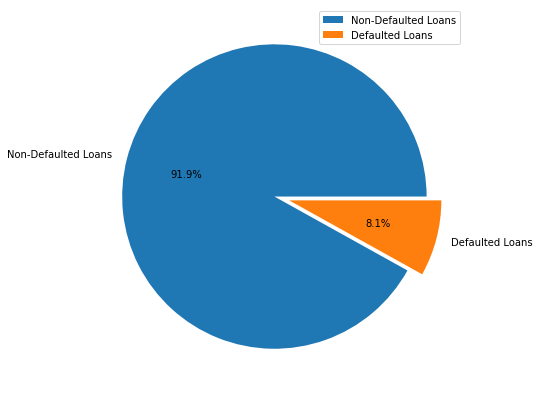

In [82]:
plt.figure(figsize=(7,7))
plt.pie(target, explode=(0, 0.1), autopct='%1.1f%%', labels=['Non-Defaulted Loans', 'Defaulted Loans'])
plt.legend()
plt.show()

We have an imbalanced dataset with Loans being Non-Defaulted being around 92% and Defaulted Loans at 8%

It would make more sense to split these two categories and look at them side by side for more details.

In [83]:
# separate dataframes for Defaulted Loans and Non-Defaulted Loans for side-by-side comparison
defaulted_loans = app_data[app_data['TARGET'] == 1]
non_defaulted_loans = app_data[app_data['TARGET'] == 0]

In [84]:
defaulted_loans.shape

(24825, 54)

In [85]:
non_defaulted_loans.shape

(282686, 54)

In [86]:
# function to plot Charts for Side by Side comparison of Defaulted and Non-Defaulted Loans

def plot_count_plots(col, rotate_xticks=False):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # first chart will have data from Non-defaulted loans
    c1 = sns.countplot(ax=ax1, data=non_defaulted_loans, x=col)
    ax1.set_title(f'Distribution of {col} for Non-Defaulted Loans')
    
    # second chart will have data from Defaulted loans
    c2 = sns.countplot(ax=ax2, data=defaulted_loans, x=col)
    ax2.set_title(f'Distribution of {col} for Defaulted Loans')
    
    if rotate_xticks:
        plt.setp(ax1.get_xticklabels() + ax2.get_xticklabels(), rotation=30, ha='right')

    plt.tight_layout()
#     plt.savefig(f'charts/plot_count_{col}.png')
    plt.show()

In [87]:
# function to plot charts
# Chart 1 - Overall counts of data
# Chart 2 - Percentage of loans (by Target value 1)

def plot_comparison_charts(col, ylog=False, rotate_xticks=False, size=(12, 6), horizontal=False, df=app_data):
    if horizontal:
        fig, (ax1, ax2) = plt.subplots(2, 1, figsize=size)
    else:
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=size)

    target1_percentage = df[[col, 'TARGET']].groupby([col], as_index=False).mean()
    target1_percentage['TARGET'] = target1_percentage['TARGET'] * 100
    target1_percentage.sort_values(by='TARGET', ascending=True, inplace=True)  

    # first chart will have Overall counts
    c1 = sns.countplot(ax=ax1, data=df, x=col, hue ='TARGET', order=target1_percentage[col])
    ax1.set_title(f'Distribution of {col}')
    ax1.legend(['Non-Defaulted','Defaulted'])

    # second chart will have percentage from defaulted loans (Target = 1)
    c2 = sns.barplot(ax=ax2, data=target1_percentage, x=col, y='TARGET', order=target1_percentage[col])
    ax2.set_title(f'Percentage Distribution of {col}')
    ax2.set_ylabel("Percentage of defaulters(%)")

    if ylog:
        ax1.set_yscale('log')
    
    if rotate_xticks:
        plt.setp(ax1.get_xticklabels() + ax2.get_xticklabels(), rotation=30, ha='right')
        
    plt.tight_layout()
#     plt.savefig(f'charts/plot_comparison_{col}.png')
    plt.show()

In [88]:
# function to create Pie Charts for Overall Loan % categories

def plot_pie(col, df=app_data):
    temp_df = df[col].value_counts()
    plt.figure(figsize=(7, 7))
    plt.pie(temp_df, autopct='%1.1f%%', labels=temp_df.index)
    
    plt.title(f'Pie Chart for {col}')    
    plt.legend()
    plt.tight_layout()
#     plt.savefig(f'charts/plot_pie_{col}.png')
    plt.show()

In [89]:
# function to create Bar Plots for Overall Loan % categories

def plot_bar(col, rotate_xticks=False, size=(8, 6), df=app_data):
    temp_df = (df[col].value_counts(normalize=True) * 100).round(2)
    plt.figure(figsize=size)
    sns.barplot(x = temp_df.index, y = temp_df.values)
    
    if rotate_xticks:
        plt.xticks(rotation=45, ha='right')
    
    plt.title(f'Bar Plot for {col}')
    plt.tight_layout()
#     plt.savefig(f'charts/plot_bar_{col}.png')
    plt.show()

In [90]:
# function to plot Category Charts for Side by Side comparison of Defaulted and Non-Defaulted Loans

def plotting(col, row_level=False, rotate_xticks=False, p='Set1'):
    
    cat_order = app_data[col].value_counts().index
    
    if row_level:
        chart = sns.catplot(data=app_data, x=col, row='TARGET', kind='count',\
                            order=cat_order, height=5, aspect=2.5, sharey=False)
    else:
        chart = sns.catplot(data=app_data, x=col, col='TARGET', kind='count',\
                            order=cat_order, sharey=False, palette=p, height=6)
    
    if rotate_xticks:
        chart.set_xticklabels(rotation=45, horizontalalignment='right', fontsize='large')
    else:
        chart.set_xticklabels(fontsize='large')
    
    plt.subplots_adjust(top=0.8)
    chart.fig.suptitle(f' Comparison of Target data on {col}')
    plt.tight_layout()
#     plt.savefig(f'charts/plotting_{col}.png')
    plt.show()

In [91]:
# function to plot distribution of data

def plot_dist_charts(col, df=app_data):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
    
    # first chart will contain the distribution of data
    c1 = sns.distplot(df[col].dropna(), kde=True, ax=ax1)
    ax1.set_title(f'Distribution of {col}')

    # second chart will contain the boxplot of the data
    c2 = sns.boxplot(data=df, x=col, orient='v', ax=ax2)
    ax2.set_title(f'Box Plot of {col}')

    plt.tight_layout()
#     plt.savefig(f'charts/plot_dist_{col}.png')
    plt.show()

##### 5.1.2 Types of loan

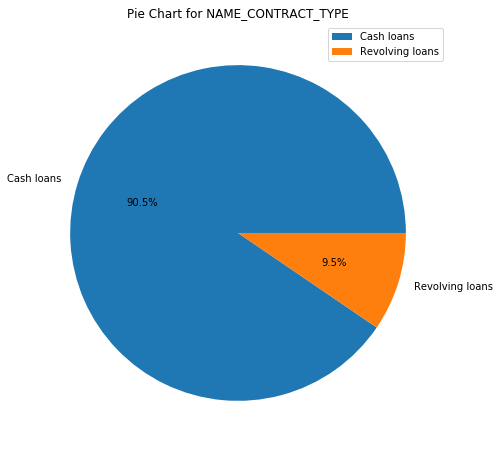

In [92]:
# Overall % of loan Contract_Type
plot_pie('NAME_CONTRACT_TYPE')

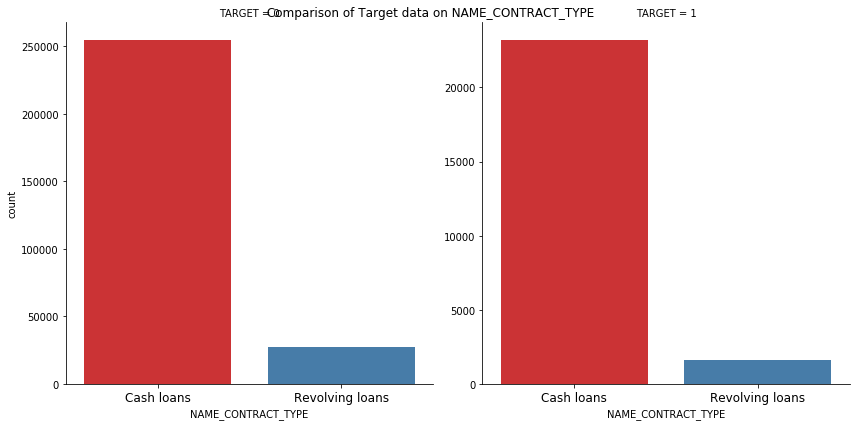

In [93]:
# Comparison of Loan Contract_Types for Defaulters and Non-Defaulters
plotting('NAME_CONTRACT_TYPE')

Ratio of cash loan to revolving loan is same for both non defaulters and defaulters. 

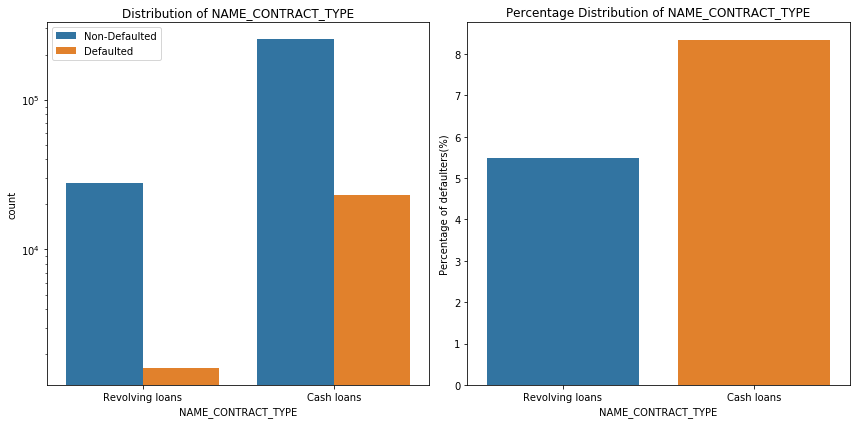

In [94]:
plot_comparison_charts('NAME_CONTRACT_TYPE', ylog=True)

- Cash Loans dominate the Loan category with over 90%
- Contract type - Revolving are smaller fraction in overall category, but have a large percentage of Defaulters

##### 5.1.3 Gender

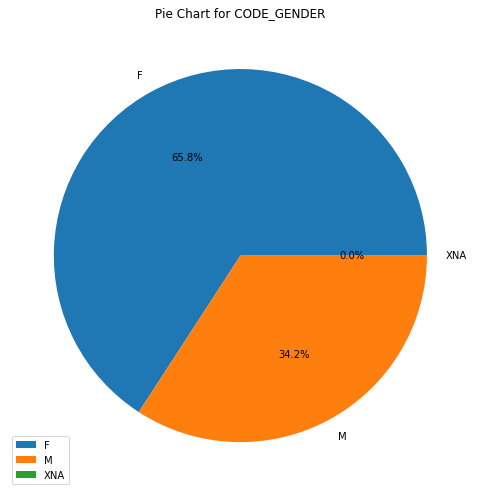

In [95]:
# Overall % of loans taken by Gender
plot_pie('CODE_GENDER')

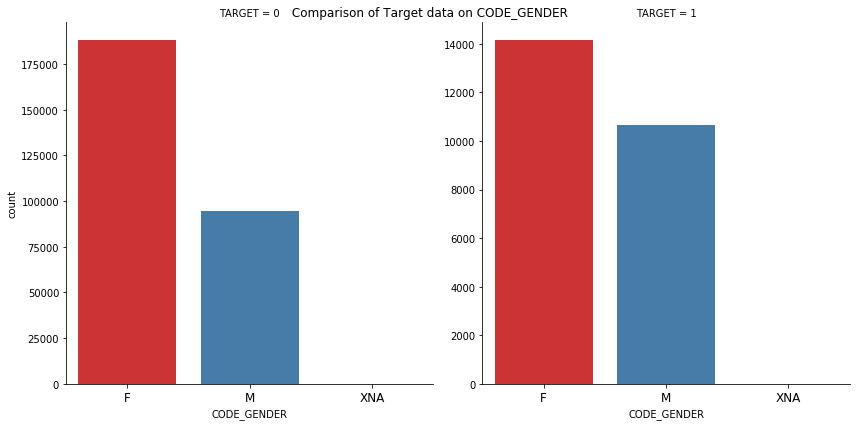

In [96]:
# Comparison of Loans per Gender for Defaulters and Non-Defaulters
plotting('CODE_GENDER')

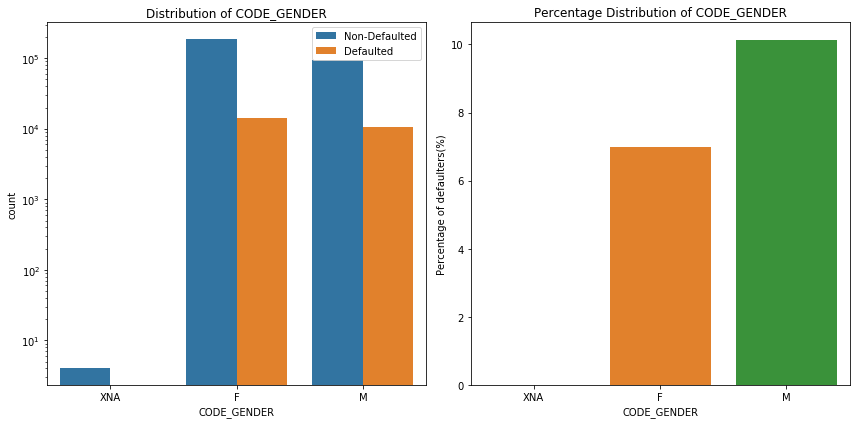

In [97]:
plot_comparison_charts('CODE_GENDER', ylog=True)

 - Overall Females have higher percentage of Loans.
 - Males are on the higher end in defaulted loans category

##### 5.1.4 Owns Car

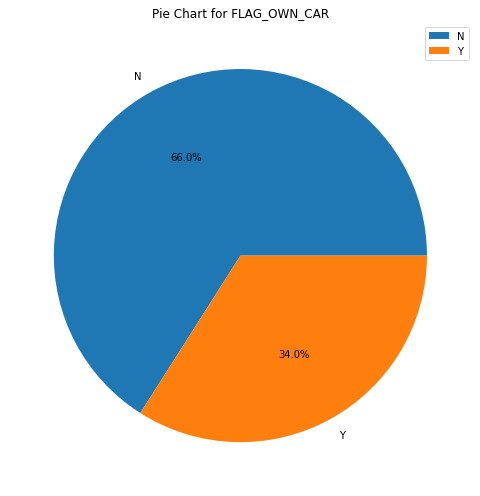

In [98]:
# Overall % of Loans applicants owning a Car
plot_pie('FLAG_OWN_CAR')

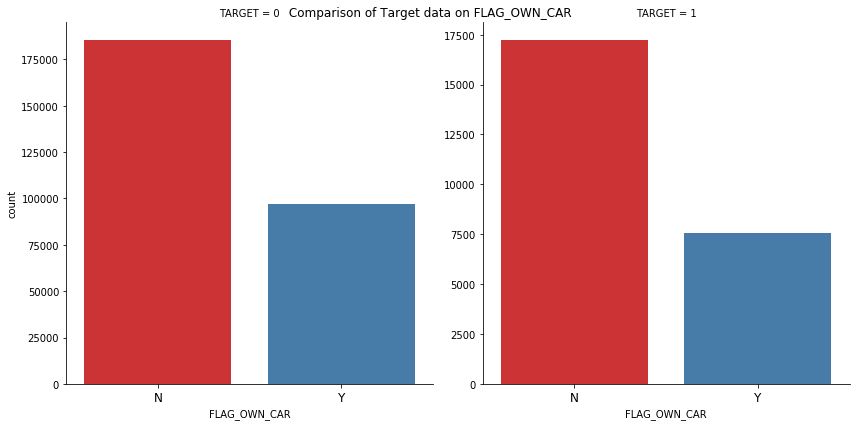

In [99]:
# Comparison of Loans applicants owning a Car for Defaulters and Non-Defaulters
plotting('FLAG_OWN_CAR')

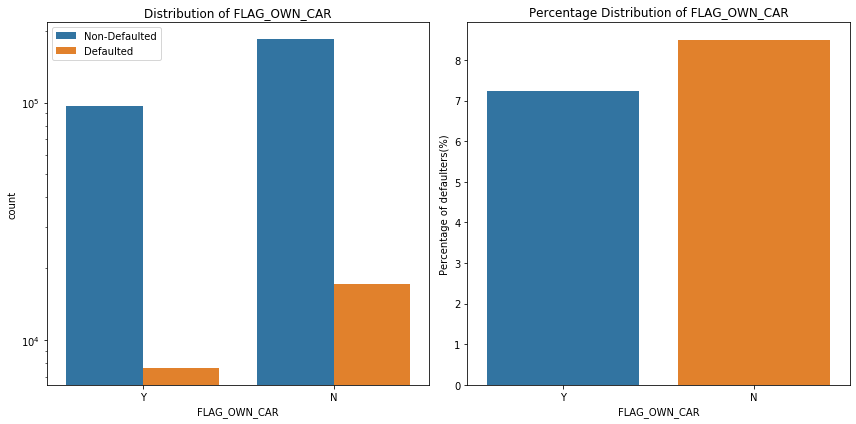

In [100]:
plot_comparison_charts('FLAG_OWN_CAR', ylog=True)

- Majority of applicants do not own a car.
- Applicants who do not own a car are the major defaulters. But both categories have non-repayment above 70%

##### 5.1.5 Owns Realty

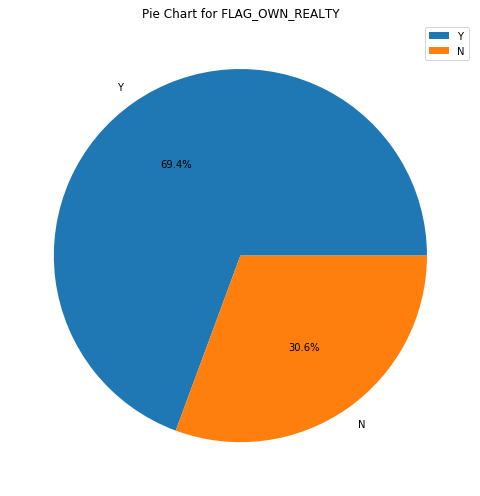

In [101]:
# Overall % of Loans applicants owning a Realty
plot_pie('FLAG_OWN_REALTY')

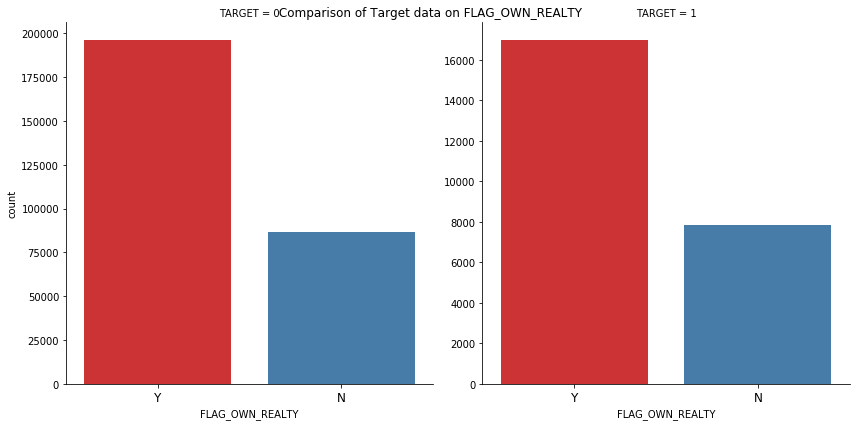

In [102]:
# Comparison of Loans applicants owning a Car for Defaulters and Non-Defaulters
plotting('FLAG_OWN_REALTY')

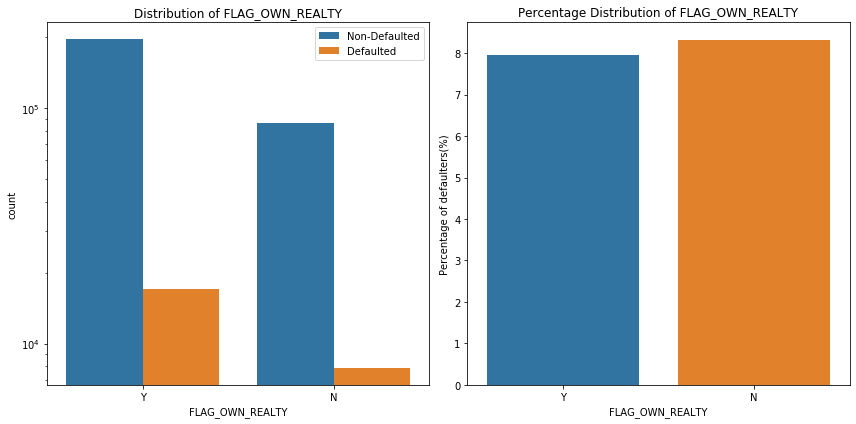

In [103]:
plot_comparison_charts('FLAG_OWN_REALTY', ylog=True)

- Majority of applicants own a house or flat.
- Both categories have non-repayment rates around 80%

##### 5.1.6 Co-applicant

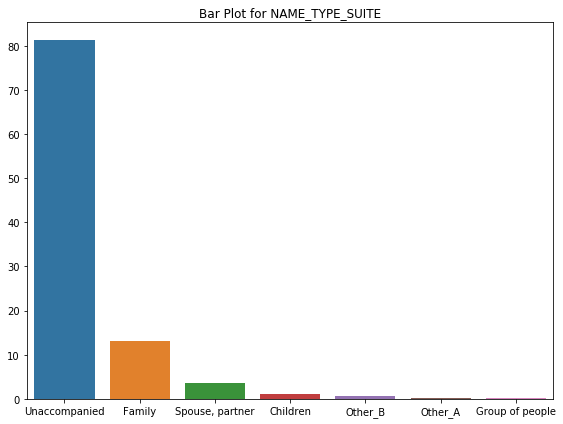

In [104]:
# Overall % of Loans having co-applicants
plot_bar('NAME_TYPE_SUITE')

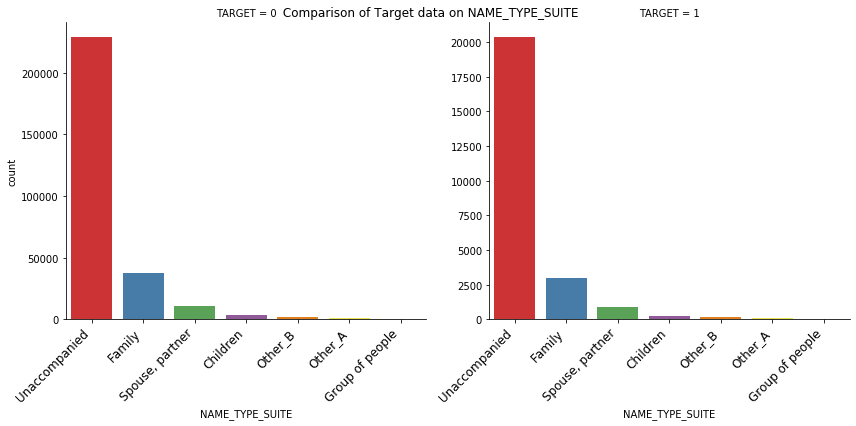

In [105]:
# Comparison of Loans having co-applicants for Defaulters and Non-Defaulters
plotting('NAME_TYPE_SUITE', rotate_xticks=True)

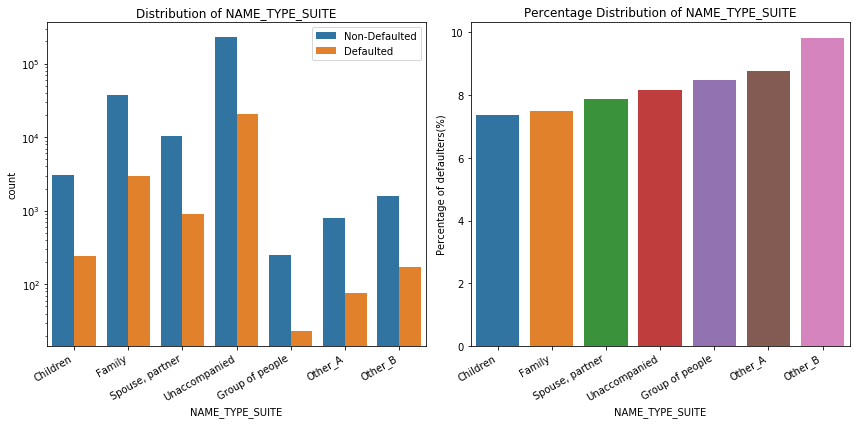

In [106]:
plot_comparison_charts('NAME_TYPE_SUITE', rotate_xticks=True, ylog=True)

- Majority of the Loans are of Individual applicants
- Group Applications are the lowest
- Children and Family Co-Applicants have lower percentage of repayment difficulty

##### 5.1.7 Income Type

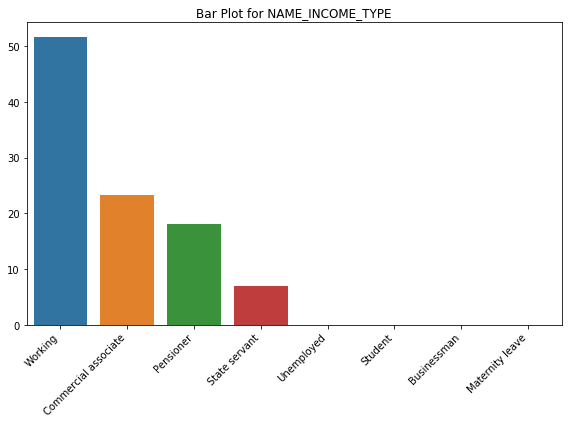

In [107]:
# Overall % of Loans per Income Type category
plot_bar('NAME_INCOME_TYPE', rotate_xticks=True)

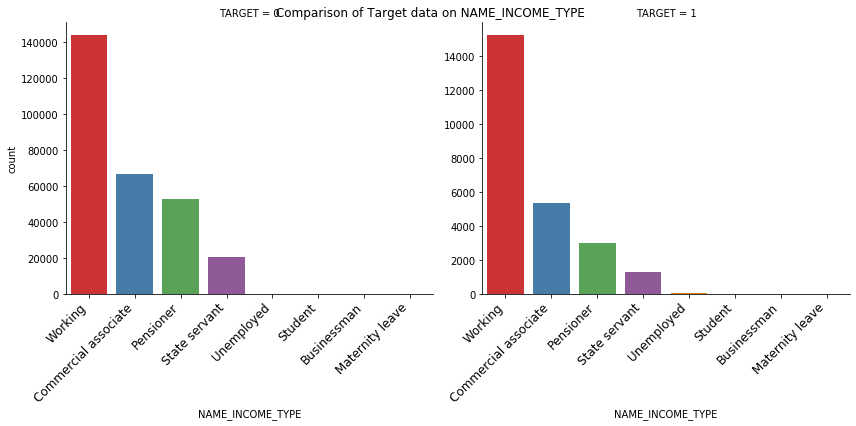

In [108]:
# Comparison of Loans per Income Type for Defaulters and Non-Defaulters
plotting('NAME_INCOME_TYPE', rotate_xticks=True)

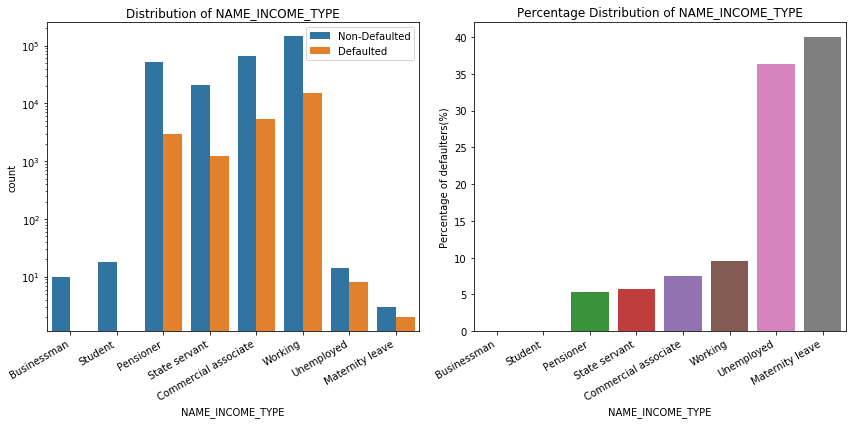

In [109]:
plot_comparison_charts('NAME_INCOME_TYPE', rotate_xticks=True, ylog=True)

- Working people, Commercial associates, Pensioners and State servants are the major applicants for the loan (Credit).
- Applicants with 'Maternity Leave' Income Type have maximum % of Loan-Paymend difficulties (40%)

##### 5.1.8 Education Type

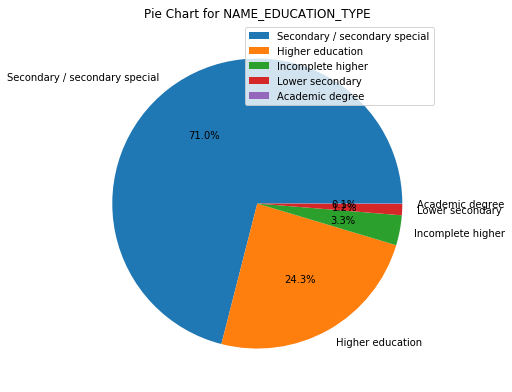

In [110]:
# Overall % of Loans per Education Type category
plot_pie('NAME_EDUCATION_TYPE')

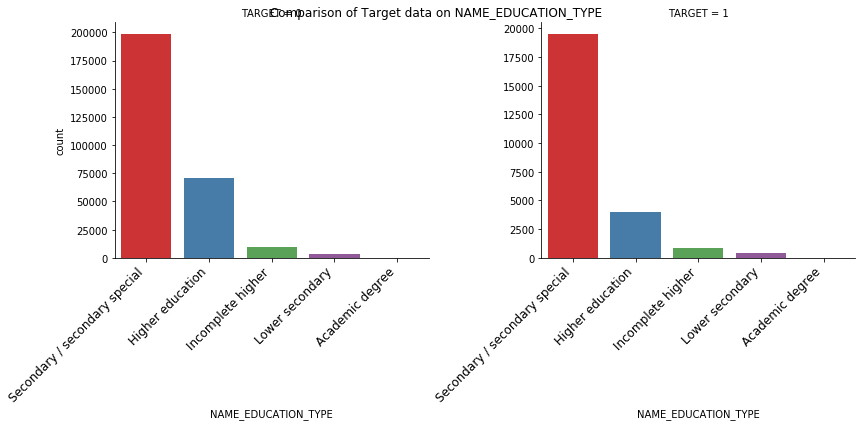

In [111]:
# Comparison of Loans per Education Type for Defaulters and Non-Defaulters
plotting('NAME_EDUCATION_TYPE', rotate_xticks=True)

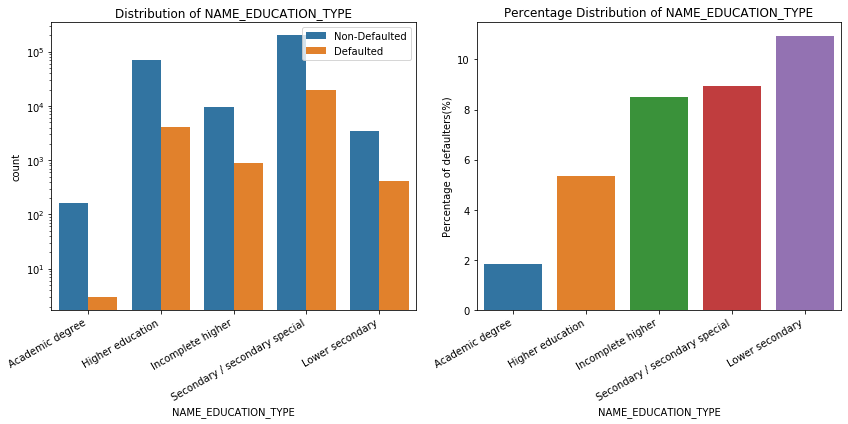

In [112]:
plot_comparison_charts('NAME_EDUCATION_TYPE', rotate_xticks=True, ylog=True)

- Most applicants are with Secondary/secondary special education.
- Lower secondary category applicants are lower borrowers but top the Defulters. Applicants with academic degree have lowest Defaulters % compared to other categories.

##### 5.1.9 Family Status

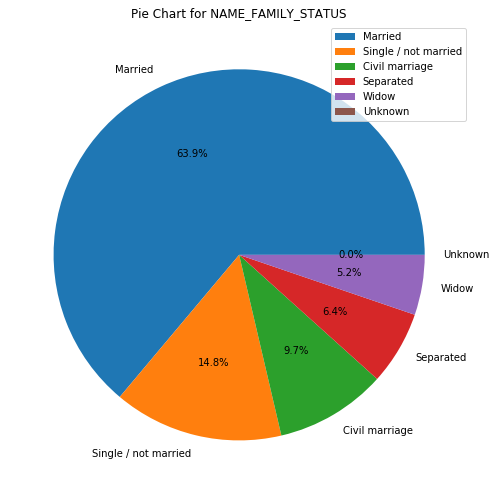

In [113]:
# Overall % of Loans applicant's Family status
plot_pie('NAME_FAMILY_STATUS')

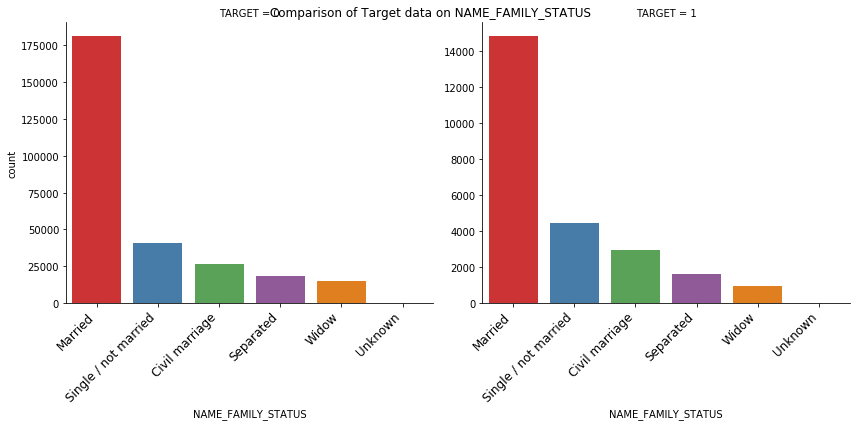

In [114]:
# Comparison of Loan Applicant's Family Status for Defaulters and Non-Defaulters
plotting('NAME_FAMILY_STATUS', rotate_xticks=True)

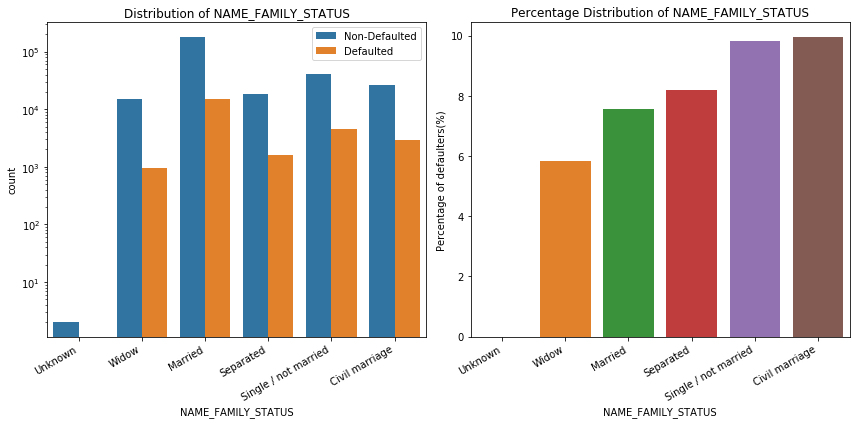

In [115]:
plot_comparison_charts('NAME_FAMILY_STATUS', rotate_xticks=True, ylog=True)

- The family status shows same trend for non defaulters and defaulters.
- Civil Married people are the main defaulters compared to other sections.
- Widows are lowest in number in the defaulters category.

##### 5.1.10 Housing Type

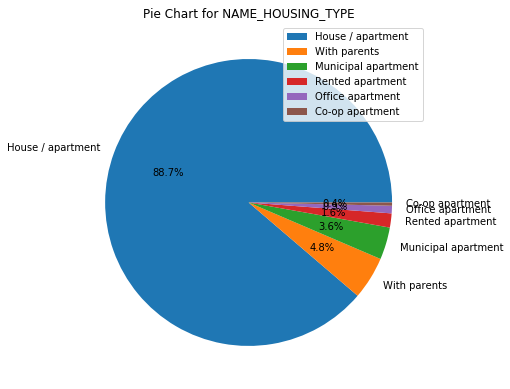

In [116]:
# Overall % of Loan Applicant's Housing Type
plot_pie('NAME_HOUSING_TYPE')

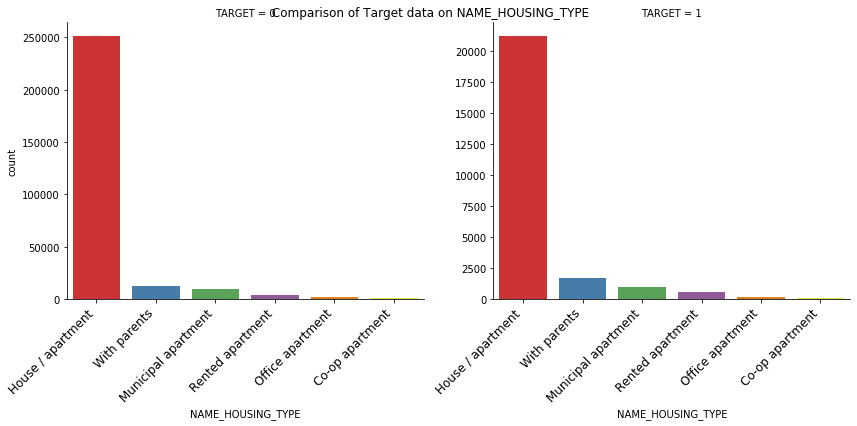

In [117]:
# Comparison of Loan Applicant's Housing Type for Defaulters and Non-Defaulters
plotting('NAME_HOUSING_TYPE', rotate_xticks=True)

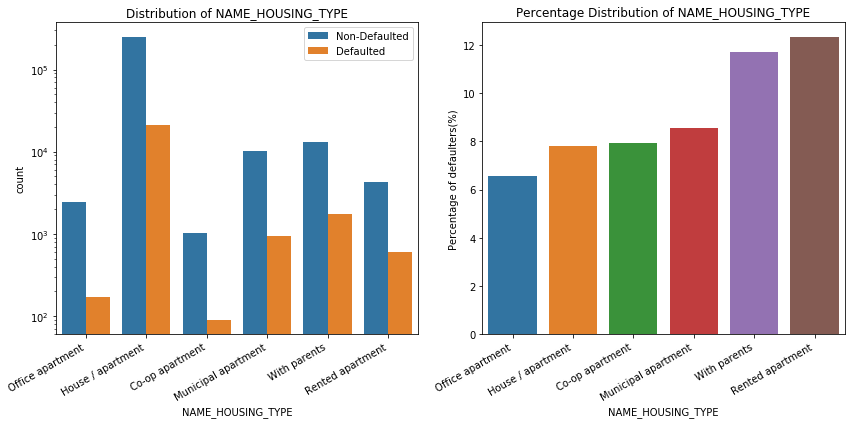

In [118]:
plot_comparison_charts('NAME_HOUSING_TYPE', rotate_xticks=True, ylog=True)

- Majority of the applicants possess a house/apartment.
- Applicants in Rented apartment or Staying with parents top the Defaulters list

##### 5.1.11 Occupation Type

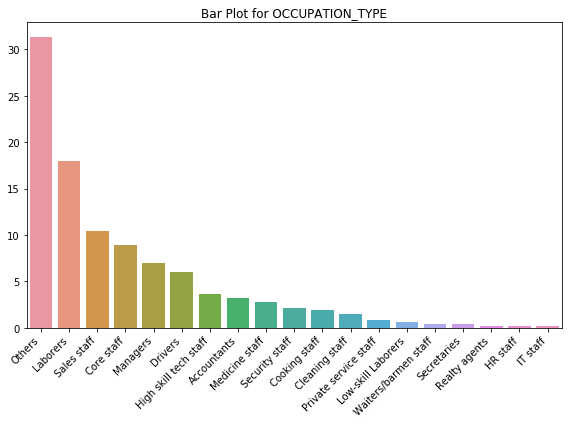

In [119]:
# Overall % of Loan Applicant's Occupation Type
plot_bar('OCCUPATION_TYPE', rotate_xticks=True)

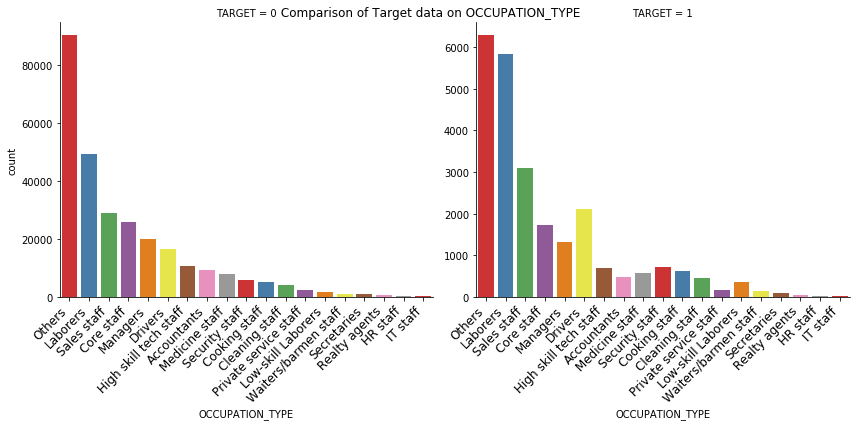

In [120]:
# Comparison of Loan Applicant's Occupation Type for Defaulters and Non-Defaulters
plotting('OCCUPATION_TYPE', rotate_xticks=True)

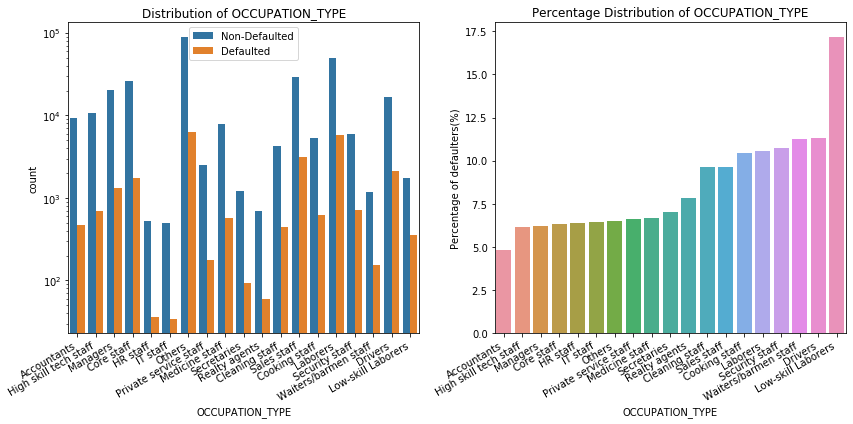

In [121]:
plot_comparison_charts('OCCUPATION_TYPE', rotate_xticks=True, ylog=True)

- Most of the loans are taken by Laborers followed by Sales Staff.
- Low-skill/Laborers top the Defaulters category with 17% followed by rivers and Waiters/barmen staff

##### 5.1.12 Organization Type

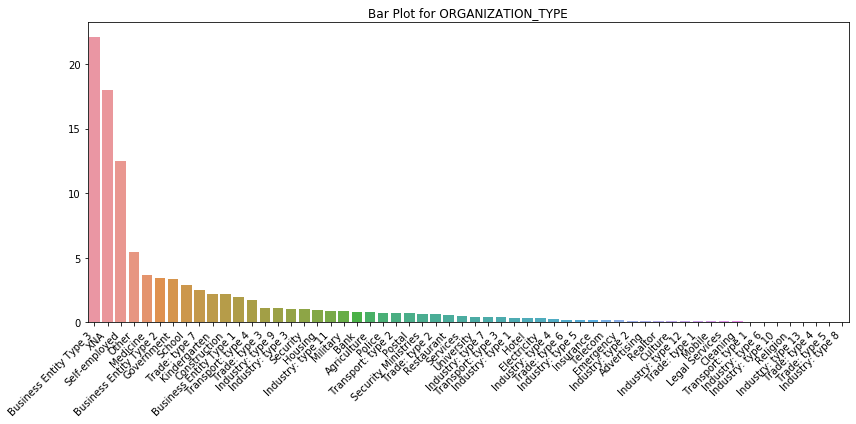

In [122]:
# Overall % of Loan Applicant's Organization Type
plot_bar('ORGANIZATION_TYPE', rotate_xticks=True, size=(12, 6))

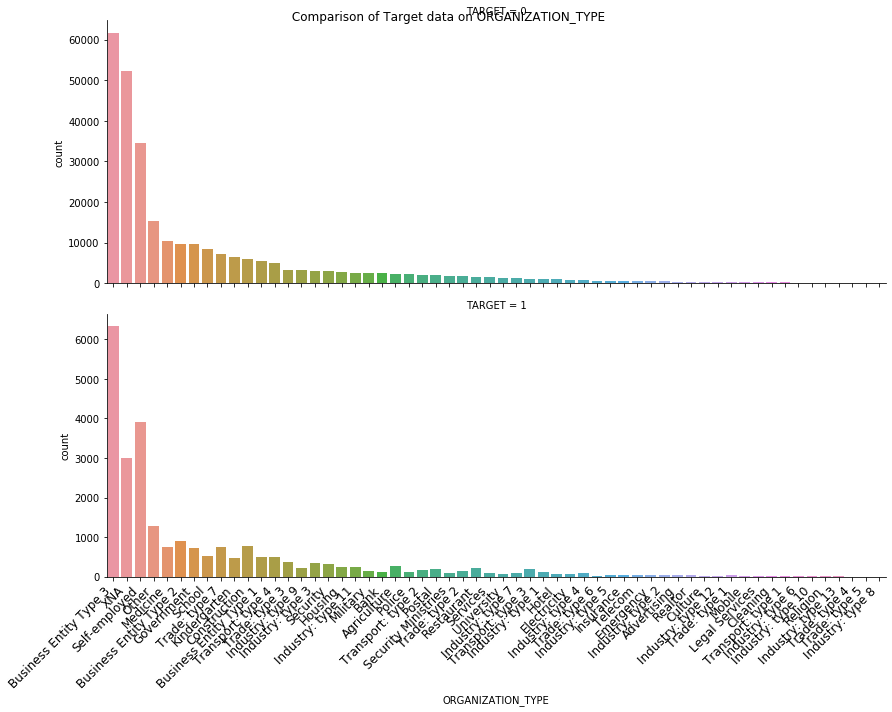

In [123]:
# Comparison of Loan Applicant's Organization Type for Defaulters and Non-Defaulters
# chart = sns.catplot(data=app_data, x='ORGANIZATION_TYPE', row='TARGET', kind='count', height=5, aspect=2.5, sharey=False)
# chart.set_xticklabels(rotation=45, horizontalalignment='right', fontsize='large')

# plt.tight_layout()
# plt.show()

plotting(col='ORGANIZATION_TYPE', rotate_xticks=True, row_level=True)

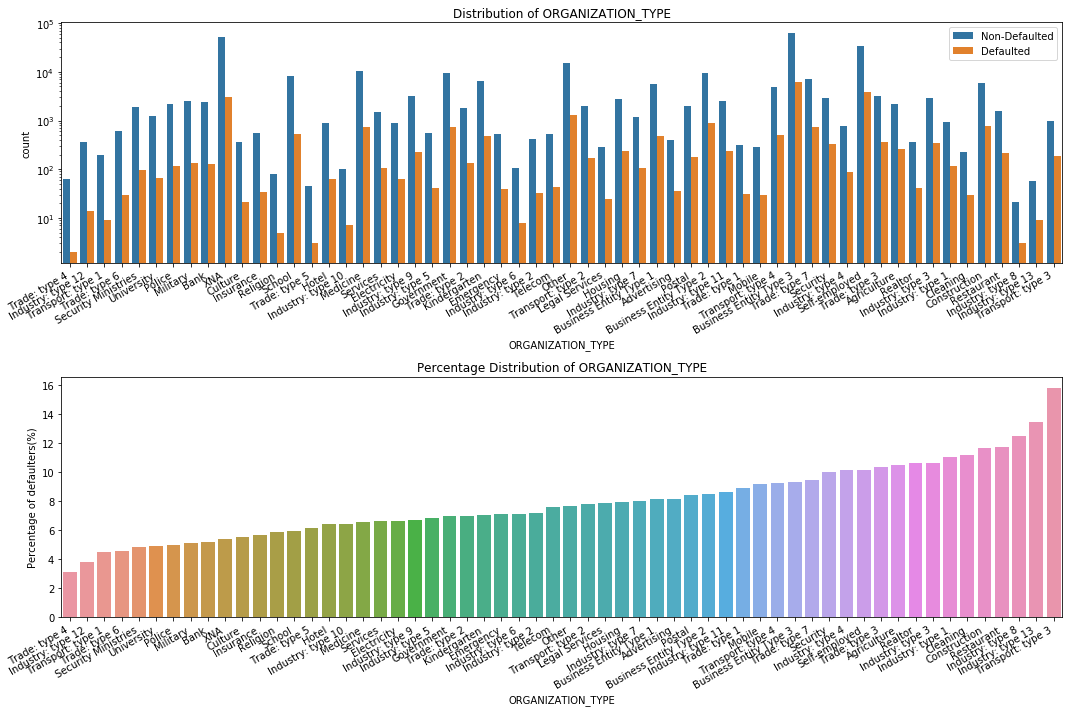

In [124]:
plot_comparison_charts('ORGANIZATION_TYPE', rotate_xticks=True, ylog=True, horizontal=True, size=(15, 10))

- Among the Organisation type the major defaulters are - Transport: type 3 (15%), Industry: type 13(13%)

##### 5.1.13 Age

In [125]:
app_data['DAYS_BIRTH'].describe()

count    307511.000000
mean         43.435968
std          11.954593
min          20.000000
25%          34.000000
50%          43.000000
75%          53.000000
max          69.000000
Name: DAYS_BIRTH, dtype: float64

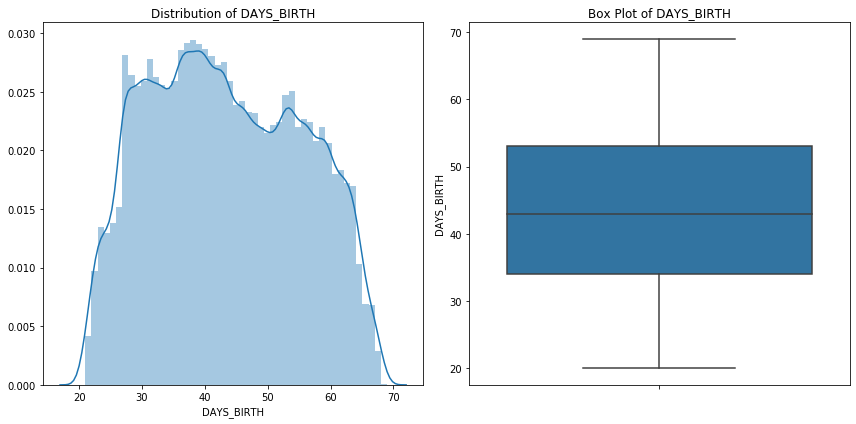

In [126]:
plot_dist_charts('DAYS_BIRTH')

In [127]:
#create the buckets of <30, 30-40, 40-50 50-60 and 60+ from DAYS_BIRTH column.
app_data['AGE'] = pd.cut(app_data.DAYS_BIRTH, [0, 30, 40, 50, 60, 100], labels=["<30", "30-40", "40-50", "50-60", "60+"])
app_data['AGE'].value_counts()

30-40    83117
40-50    74401
50-60    67819
<30      52806
60+      29368
Name: AGE, dtype: int64

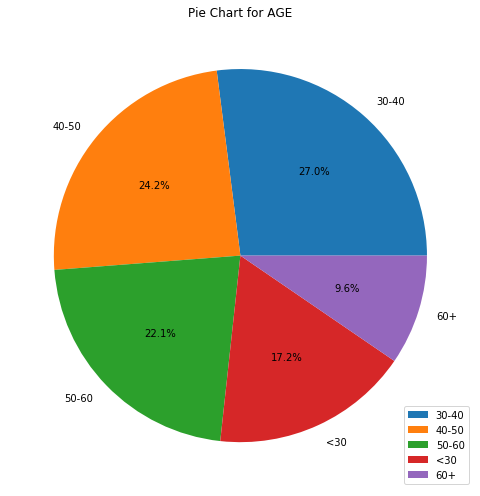

In [128]:
# Overall % of Loans taken by Age groups
plot_pie('AGE')

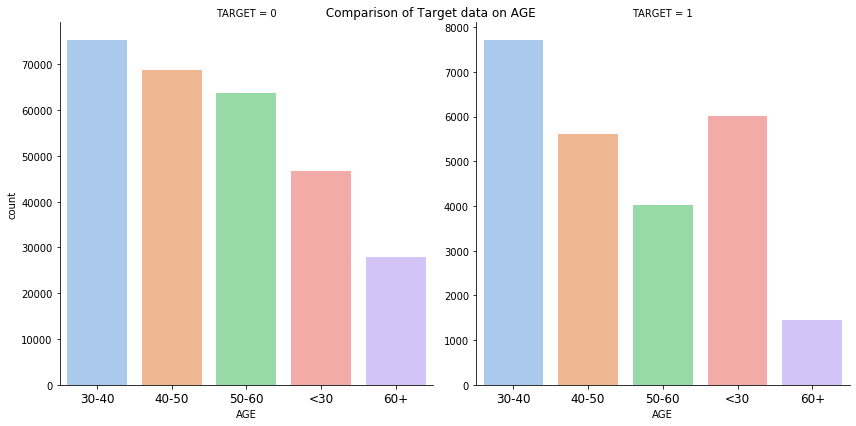

In [129]:
# Comparison of Loans per Age Group for Defaulters and Non-Defaulters
plotting('AGE', p='pastel')

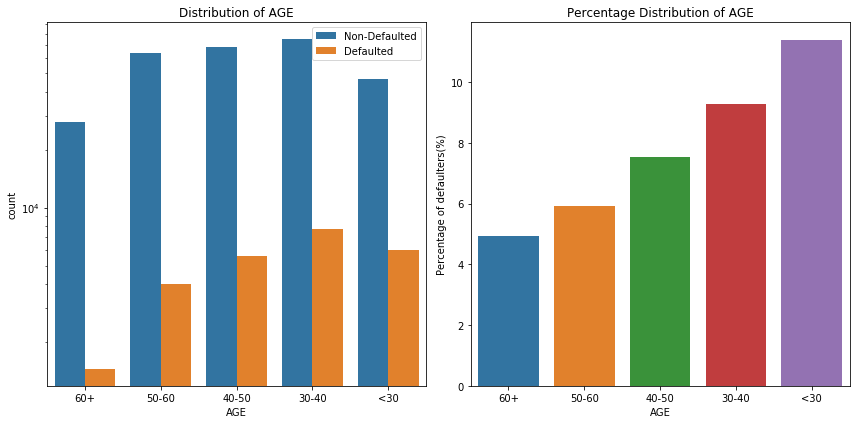

In [130]:
plot_comparison_charts('AGE', ylog=True)

- Maximum number of defaulters are in the age group <30
- Minimum number of defaulters are in the group 60+

##### 5.1.14 Employment Years

In [131]:
app_data['DAYS_EMPLOYED'].describe()

count    307511.000000
mean      65774.843941
std      140341.467218
min           0.000000
25%           2.000000
50%           6.000000
75%          15.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

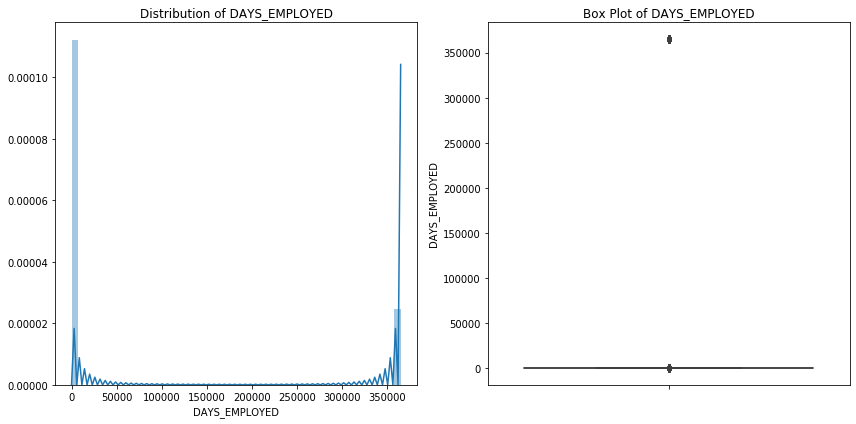

In [132]:
plot_dist_charts('DAYS_EMPLOYED')

In [133]:
app_data.DAYS_EMPLOYED[app_data['DAYS_EMPLOYED'] != 365243].describe()

count    252137.000000
mean          6.037008
std           6.416079
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max          49.000000
Name: DAYS_EMPLOYED, dtype: float64

In [134]:
# binning the dataset
app_data['YEARS_OF_EXP'] = pd.cut(app_data.DAYS_EMPLOYED, [-1, 5, 15, 25, 50, 366000], labels=["<5", "5-15", "15-25", "25-50", "U or P"])
app_data['YEARS_OF_EXP'].value_counts()

<5        152538
5-15       78911
U or P     55374
15-25      15195
25-50       5493
Name: YEARS_OF_EXP, dtype: int64

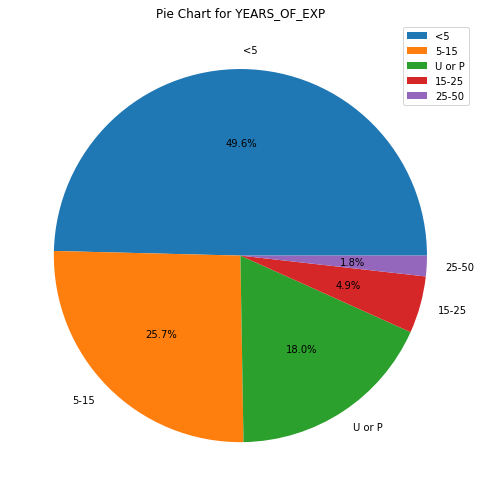

In [135]:
# Overall % of Loans taken across Years of Employement
plot_pie('YEARS_OF_EXP')

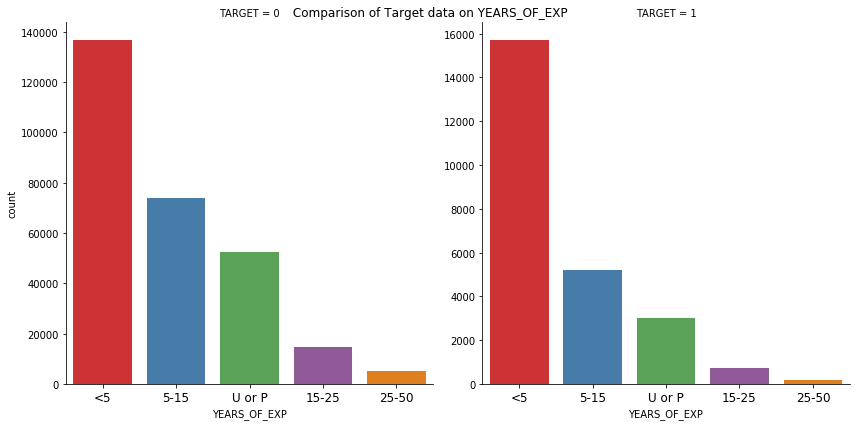

In [136]:
# Comparison of Loans per Years of Exp for Defaulters and Non-Defaulters
plotting('YEARS_OF_EXP')

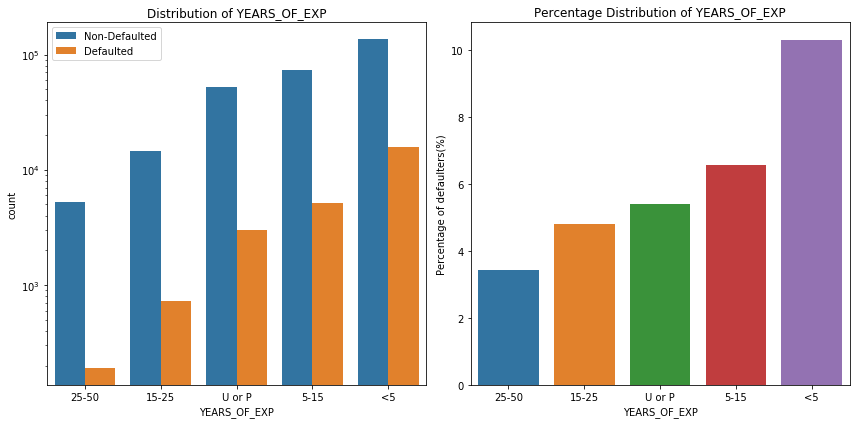

In [137]:
plot_comparison_charts('YEARS_OF_EXP', ylog=True)

- The major defaulters are having an experience of less than 5 years in the present employment.
- The number of defaulters decrease with increase in years of employment.

##### 5.1.15 Family Members

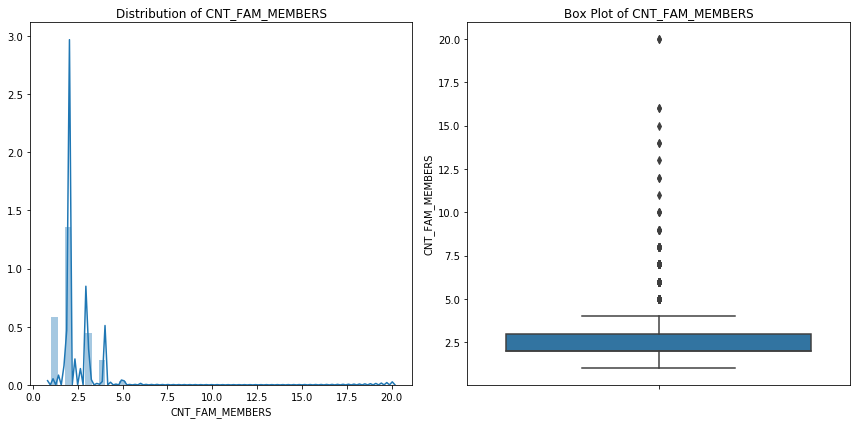

In [138]:
# distribution of data
plot_dist_charts('CNT_FAM_MEMBERS')

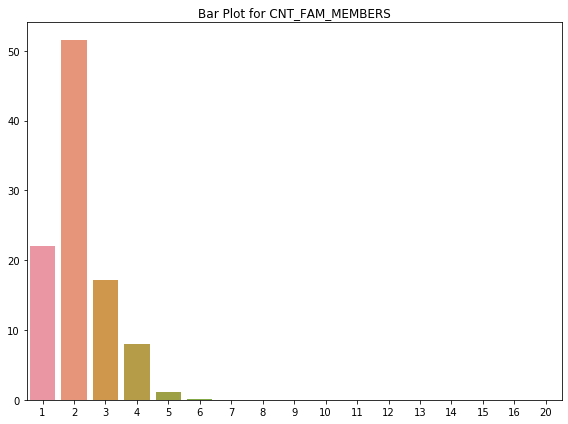

In [139]:
# Overall % of Loan's Family Member count
plot_bar('CNT_FAM_MEMBERS')

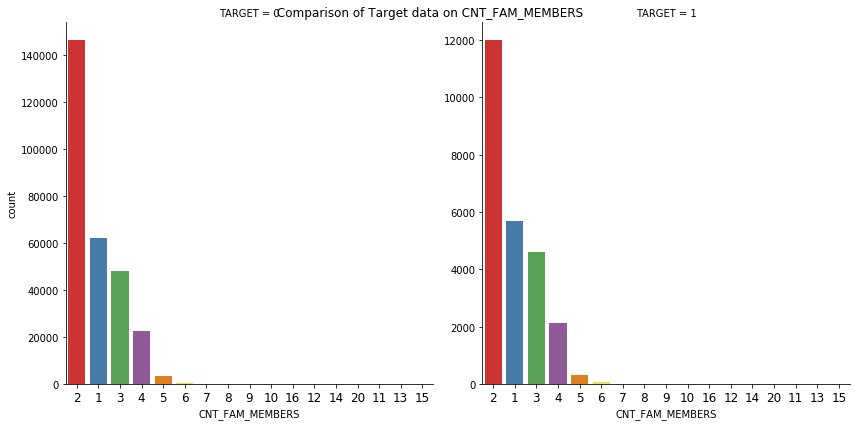

In [140]:
# Comparison of Loans Applicants Family Members counts for Defaulters and Non-Defaulters
plotting('CNT_FAM_MEMBERS')

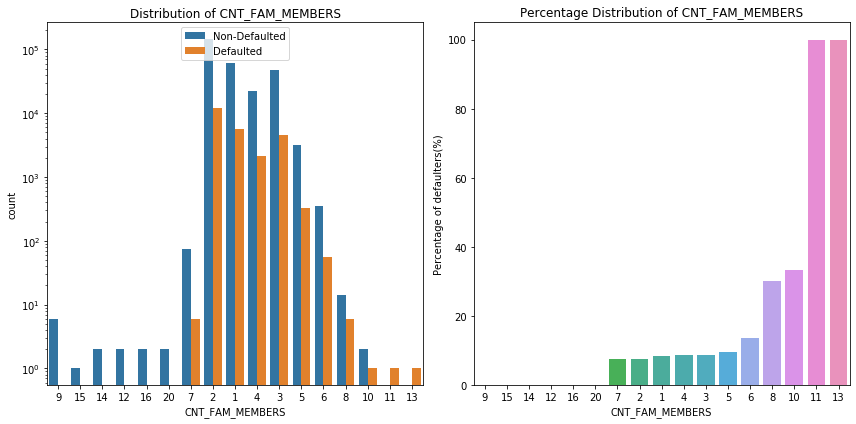

In [141]:
plot_comparison_charts('CNT_FAM_MEMBERS', ylog=True)

- Families with 2 members have highest percentage of loans.
- Applicants with family size > 10 have highest percentage of defaulted loans

##### 5.1.16 Income Range

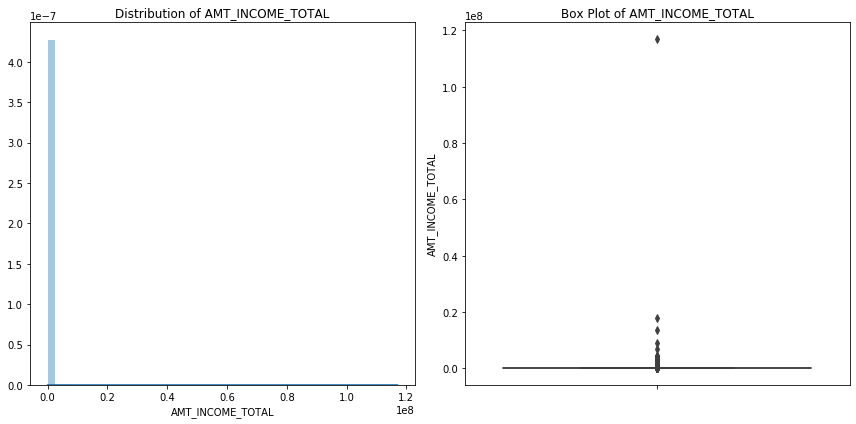

In [142]:
# distribution of data
plot_dist_charts('AMT_INCOME_TOTAL')

We can see there are Outliers which makes the data highly skewed. But these records are valid as people can get a higher salary.

 1. We can ignore these records from our analysis
 2. We can cap the higher records to 99 percentile value

In [143]:
app_data['AMT_INCOME_TOTAL'].describe()

count    3.075110e+05
mean     1.687979e+05
std      2.371231e+05
min      2.565000e+04
25%      1.125000e+05
50%      1.471500e+05
75%      2.025000e+05
max      1.170000e+08
Name: AMT_INCOME_TOTAL, dtype: float64

In [144]:
# print quantile data
app_data['AMT_INCOME_TOTAL'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50    147150.0
0.70    180000.0
0.90    270000.0
0.95    337500.0
0.99    472500.0
Name: AMT_INCOME_TOTAL, dtype: float64

In [145]:
# check records > 472500
app_data[app_data['AMT_INCOME_TOTAL'] > 472500]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
51          100059       0         Cash loans           M            Y   
59          100070       0         Cash loans           M            Y   
319         100366       0    Revolving loans           M            Y   
332         100380       0         Cash loans           F            N   
391         100454       0    Revolving loans           M            Y   
...            ...     ...                ...         ...          ...   
306882      455551       0         Cash loans           M            Y   
307002      455682       0         Cash loans           M            Y   
307022      455706       0         Cash loans           M            N   
307484      456228       0         Cash loans           F            Y   
307492      456236       0         Cash loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
51                   Y             1          540000.0    675000.0   
59                   Y             0          540000.0   1227901.5   
319                  Y             0          765000.0   1350000.0   
332                  Y             0          630000.0    900000.0   
391                  Y             3          607500.0   1350000.0   
...                ...           ...               ...         ...   
306882               Y             0          517500.0   2250000.0   
307002               N             0          546250.5   1800000.0   
307022               Y             0          540000.0    625536.0   
307484               N             0          540000.0    545040.0   
307492               Y             0          585000.0   1575000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
51          34596.0         675000.0   Unaccompanied  Commercial associate   
59          46899.0        1129500.0   Unaccompanied               Working   
319         67500.0        1350000.0   Unaccompanied  Commercial associate   
332         57519.0         900000.0          Family               Working   
391         67500.0        1350000.0   Unaccompanied  Commercial associate   
...             ...              ...             ...                   ...   
306882      59485.5        2250000.0   Unaccompanied               Working   
307002     166572.0        1800000.0   Unaccompanied  Commercial associate   
307022      38398.5         540000.0   Unaccompanied  Commercial associate   
307484      35617.5         450000.0   Unaccompanied  Commercial associate   
307492      43443.0        1575000.0   Unaccompanied               Working   

                  NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  \
51                   Higher education               Married   
59                   Higher education                 Widow   
319                  Higher education  Single / not married   
332                  Higher education               Married   
391                  Higher education               Married   
...                               ...                   ...   
306882               Higher education               Married   
307002              Incomplete higher               Married   
307022              Incomplete higher               Married   
307484  Secondary / secondary special               Married   
307492  Secondary / secondary special               Married   

        NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
51      House / apartment                    0.026392          51   
59      House / apartment                    0.032561          56   
319     House / apartment                    0.002506          32   
332     House / apartment                    0.072508          41   
391     House / apartment                    0.032561          37   
...                   ...                         ...         ...   
306882  House / apartment                    0.010006          59   
307002  House / apartment       

In [146]:
# check records > 1000000
app_data[app_data['AMT_INCOME_TOTAL'] > 1000000]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1504        101769       0    Revolving loans           M            Y   
1723        102015       0         Cash loans           F            N   
3371        103938       0         Cash loans           F            N   
4603        105384       0    Revolving loans           F            Y   
7061        108224       0         Cash loans           F            Y   
...            ...     ...                ...         ...          ...   
298082      445335       0         Cash loans           M            Y   
300468      448102       0         Cash loans           F            N   
304477      452764       0         Cash loans           F            Y   
305577      454039       0         Cash loans           M            Y   
306028      454569       0    Revolving loans           M            Y   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
1504                 Y             0         1080000.0    180000.0   
1723                 Y             0         1935000.0    269550.0   
3371                 N             1         1350000.0   2410380.0   
4603                 Y             0         1350000.0    405000.0   
7061                 N             0         1035000.0   2695500.0   
...                ...           ...               ...         ...   
298082               Y             0         2475000.0   1125000.0   
300468               Y             0         1575000.0   1223010.0   
304477               Y             1         2025000.0    935640.0   
305577               Y             0         1215000.0   1264738.5   
306028               Y             0         1350000.0   1575000.0   

        AMT_ANNUITY  AMT_GOODS_PRICE NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
1504         9000.0         180000.0   Unaccompanied  Commercial associate   
1723        10534.5         225000.0   Unaccompanied             Pensioner   
3371       109053.0        2250000.0   Unaccompanied  Commercial associate   
4603        20250.0         405000.0   Unaccompanied  Commercial associate   
7061        74254.5        2250000.0   Unaccompanied  Commercial associate   
...             ...              ...             ...                   ...   
298082      47794.5        1125000.0   Unaccompanied               Working   
300468      51948.0        1125000.0          Family         State servant   
304477      93487.5         900000.0   Unaccompanied  Commercial associate   
305577      67513.5        1138500.0   Unaccompanied  Commercial associate   
306028      78750.0        1575000.0   Unaccompanied  Commercial associate   

                  NAME_EDUCATION_TYPE NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
1504                 Higher education            Married  House / apartment   
1723    Secondary / secondary special            Married  House / apartment   
3371                 Higher education            Married  House / apartment   
4603                 Higher education            Married  House / apartment   
7061                 Higher education          Separated  House / apartment   
...                               ...                ...                ...   
298082  Secondary / secondary special            Married  House / apartment   
300468  Secondary / secondary special            Married  House / apartment   
304477               Higher education            Married  House / apartment   
305577               Higher education     Civil marriage  House / apartment   
306028               Higher education            Married  House / apartment   

        REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  \
1504                      0.072508          37             15   
1723                      0.007114          51         365243   
3371                      0.072508          33              2   
4603                      0.018801          40             13   
7061                      0.046220          29              1   
..

In [147]:
# binning the data
# bins = [0, 100000, 200000, 300000, 400000, 500000, 600000, 700000, 800000, 900000, 1000000, 120000000]
# labels = ['0-1L', '1-2L', '2-3L', '3-4L', '4-5L', '5-6L', '6-7L', '7-8L', '8-9L', '9-10L', '10L+']

app_data['INCOME_RANGE'] = pd.qcut(app_data.AMT_INCOME_TOTAL, q=[0, 0.2, 0.5, 0.8, 0.95, 1], labels=['VERY_LOW', 'LOW', 'MEDIUM', 'HIGH', 'VERY HIGH'])
app_data['INCOME_RANGE'].value_counts()

MEDIUM       106633
LOW           90089
VERY_LOW      63671
HIGH          33083
VERY HIGH     14035
Name: INCOME_RANGE, dtype: int64

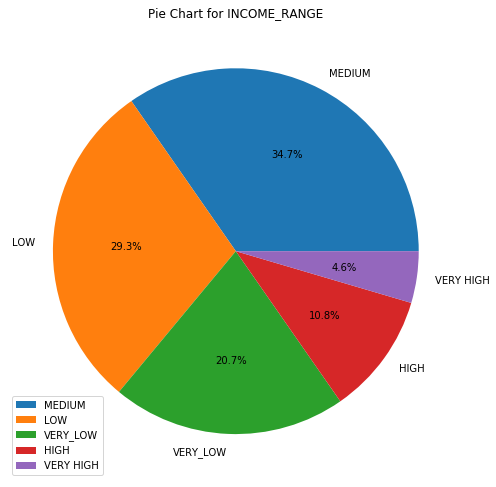

In [148]:
# Overall % of loans taken vs Income Range
plot_pie('INCOME_RANGE')

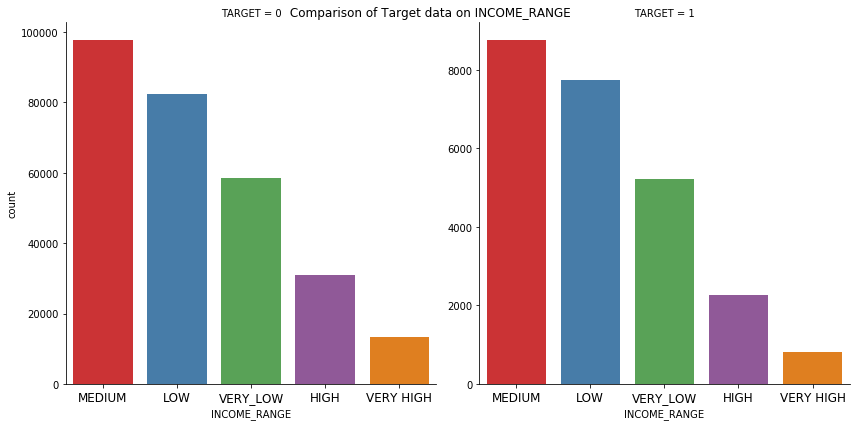

In [149]:
# Comparison of Loans vs Income Range for Defaulters and Non-Defaulters
plotting('INCOME_RANGE')

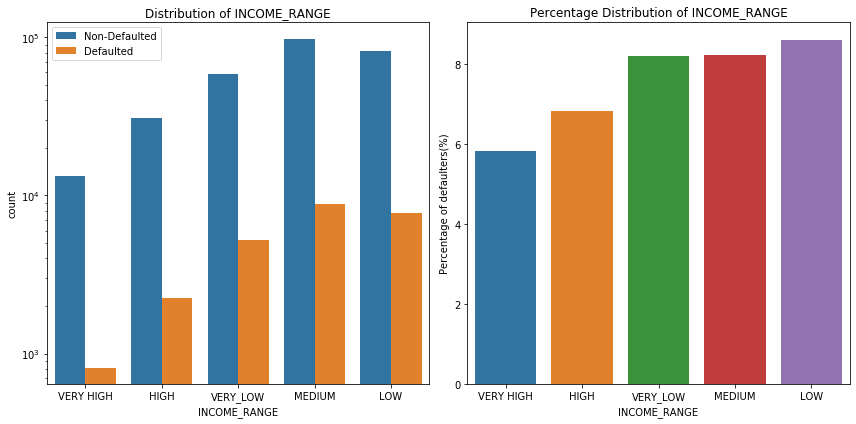

In [150]:
plot_comparison_charts('INCOME_RANGE', ylog=True)

- Low income group top the Defaulters list and Very High income group are the lowest defaulters.
- The Medium income group has the highest percentage of loans.

##### 5.1.17 AMT_CREDIT

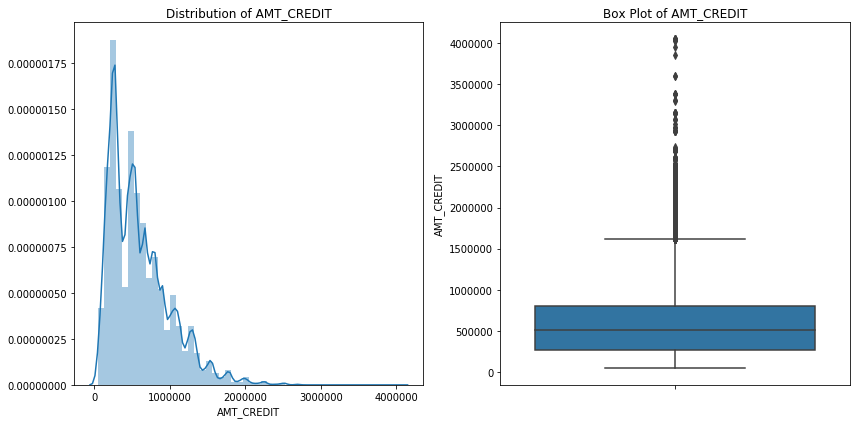

In [151]:
plot_dist_charts('AMT_CREDIT')

We can see there are Outliers which makes the data highly skewed. But these records are valid as people can get a higher loans.

 1. We can ignore these records from our analysis
 2. We can cap the higher records to 99 percentile value

In [152]:
app_data['AMT_CREDIT'].describe()

count    3.075110e+05
mean     5.990260e+05
std      4.024908e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [153]:
# print quantile data
app_data['AMT_CREDIT'].quantile([0.5, 0.7, 0.9, 0.95, 0.99])

0.50     513531.0
0.70     755190.0
0.90    1133748.0
0.95    1350000.0
0.99    1854000.0
Name: AMT_CREDIT, dtype: float64

In [154]:
# binning the dataset
# bins = [0, 250000, 500000, 750000, 1000000, 1500000, 2000000, 2500000, 5000000]
# labels = ['0-2.5L', '2.5-5L', '5-7.5L', '7.5-10L', '10-15L', '15-20L', '20-25L', '25L+']

# app_data['AMT_CREDIT_RANGE'] = pd.cut(app_data['AMT_CREDIT'],bins=bins,labels=labels)
app_data['AMT_CREDIT_RANGE'] = pd.qcut(app_data.AMT_CREDIT, q=[0, .2, .5, .8, .95, 1], labels=['VERY LOW', 'LOW', 'MEDIUM', 'HIGH', 'VERY HIGH'])
app_data['AMT_CREDIT_RANGE'].value_counts()

MEDIUM       94750
LOW          88924
VERY LOW     64925
HIGH         44878
VERY HIGH    14034
Name: AMT_CREDIT_RANGE, dtype: int64

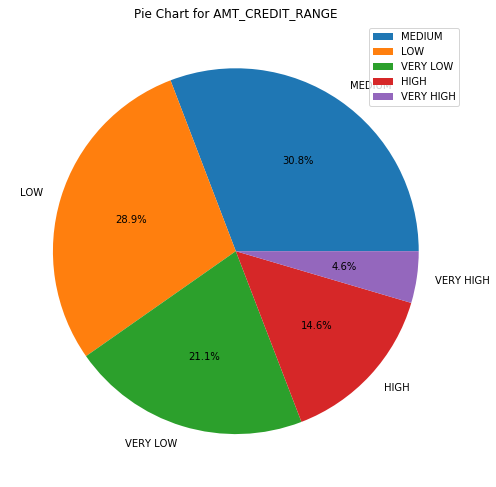

In [155]:
# Overall % of Loans Applicants Credit Range
plot_pie('AMT_CREDIT_RANGE')

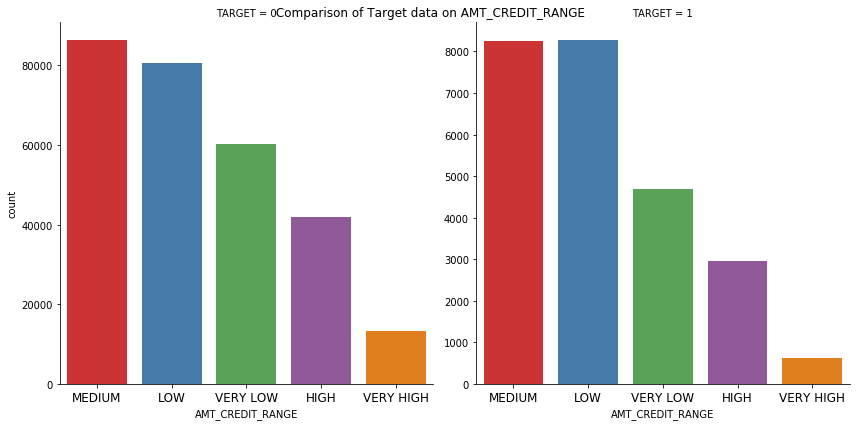

In [156]:
# Comparison of Loans vs Credit Range for Defaulters and Non-Defaulters
plotting('AMT_CREDIT_RANGE')

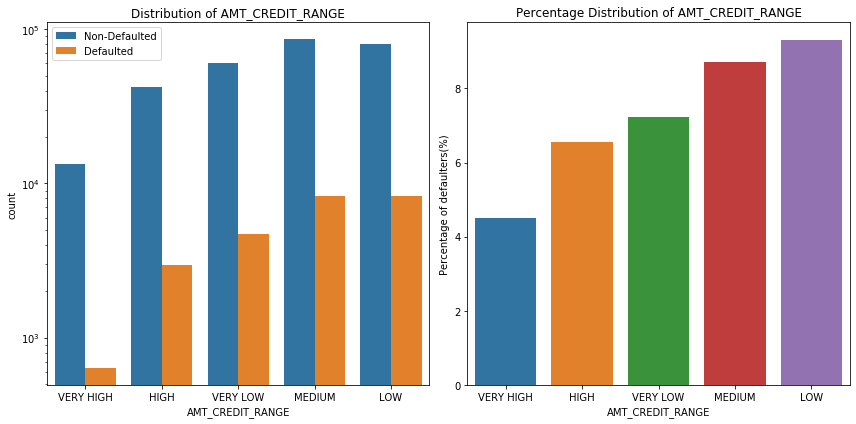

In [157]:
plot_comparison_charts('AMT_CREDIT_RANGE', ylog=True)

- Defaulters are more among low and medium credit group.

##### 5.1.18 AMT_ANNUITY

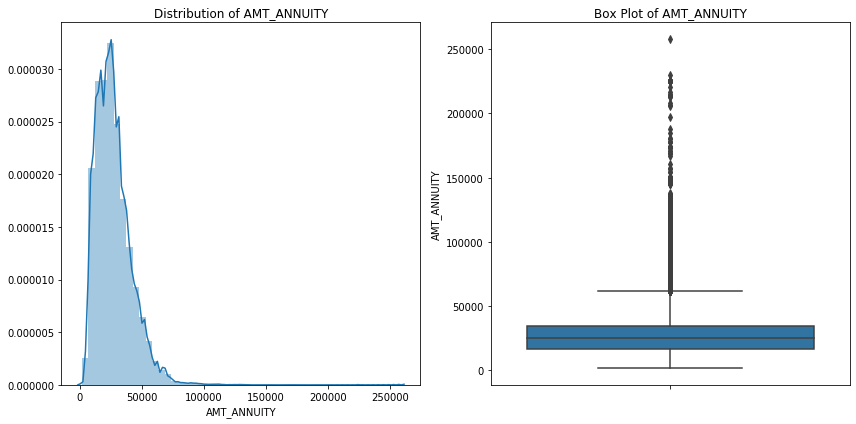

In [158]:
# distribution of data
plot_dist_charts('AMT_ANNUITY')

We can see there are Outliers which makes the data highly skewed.

 1. We can ignore these records from our analysis
 2. We can cap the higher records to 99 percentile value

In [159]:
# binning the dataset
app_data['AMT_ANNUITY_RANGE'] = pd.qcut(app_data.AMT_ANNUITY, q=[0, .2, .5, .8, .95, 1], labels=['VERY LOW', 'LOW', 'MEDIUM', 'HIGH', 'VERY HIGH'])
app_data['AMT_ANNUITY_RANGE'].value_counts()

LOW          92266
MEDIUM       92242
VERY LOW     61507
HIGH         46144
VERY HIGH    15340
Name: AMT_ANNUITY_RANGE, dtype: int64

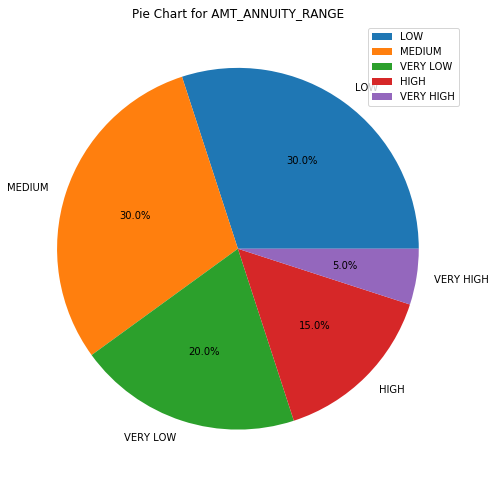

In [160]:
# Overall % of Loans Applicants Loan Annuity Range
plot_pie('AMT_ANNUITY_RANGE')

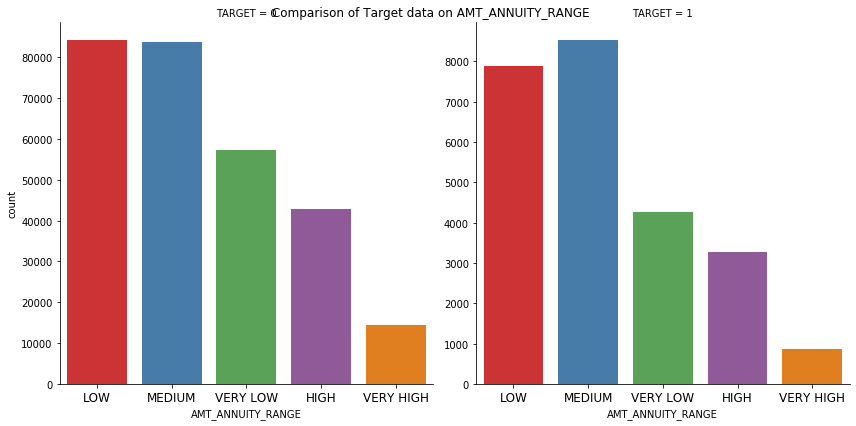

In [161]:
# Comparison of Loans vs Loan Annuity Range for Defaulters and Non-Defaulters
plotting('AMT_ANNUITY_RANGE')

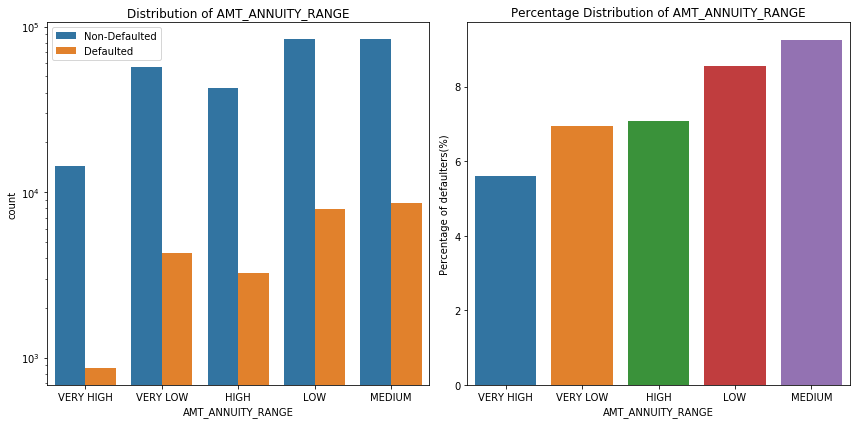

In [162]:
plot_comparison_charts('AMT_ANNUITY_RANGE', ylog=True)

- Defaulters are more amount Low and Medium Amt Annuity group.

##### 5.1.19 AMT_GOODS_PRICE

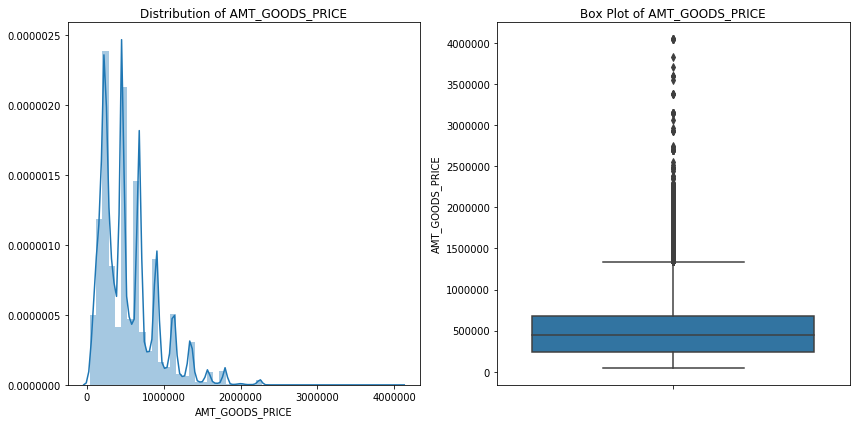

In [163]:
# check the distribution
plot_dist_charts('AMT_GOODS_PRICE')

We can see there are Outliers which makes the data highly skewed.

 1. We can ignore these records from our analysis
 2. We can cap the higher records to 99 percentile value

##### 5.1.20 CNT_CHILDREN

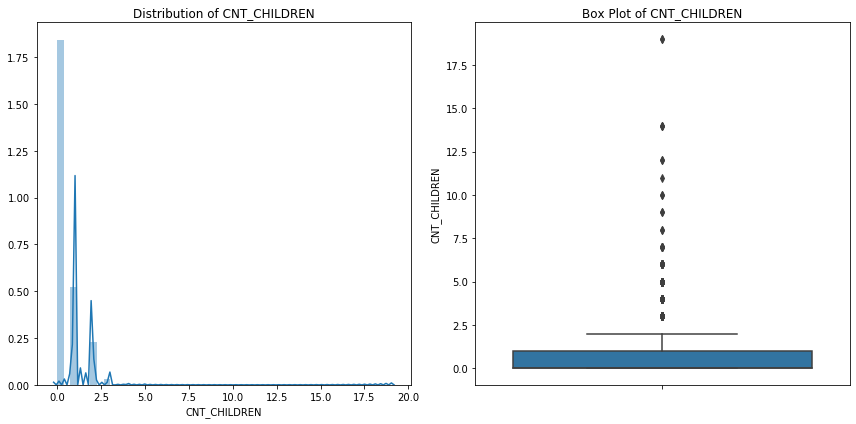

In [164]:
# distribution of dataset
plot_dist_charts('CNT_CHILDREN')

We can see there are Outliers which makes the data highly skewed.

 1. We can ignore these records from our analysis
 2. We can cap the higher records to 99 percentile value

In [165]:
app_data[app_data['CNT_CHILDREN'] > 6]

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
3079        103596       0         Cash loans           M            N   
12615       114709       0         Cash loans           M            Y   
23881       127782       1         Cash loans           F            N   
26195       130468       0         Cash loans           F            Y   
34545       140032       1         Cash loans           M            Y   
80948       193853       0         Cash loans           F            N   
116428      235015       0         Cash loans           M            N   
132585      253779       0         Cash loans           F            N   
154317      278853       0         Cash loans           F            Y   
155369      280108       0         Cash loans           F            N   
171125      298322       0    Revolving loans           F            N   
176011      303956       0         Cash loans           M            Y   
183878      313127       0         Cash loans           F            Y   
186820      316580       0         Cash loans           F            N   
190547      320933       0         Cash loans           M            N   
220134      355015       0         Cash loans           F            N   
233611      370590       0         Cash loans           M            N   
265784      407877       0         Cash loans           F            N   
267998      410527       0         Cash loans           F            N   
276768      420739       1         Cash loans           M            Y   
305112      453499       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
3079                 Y             7           85500.0    411813.0   
12615                N             8          112500.0    755190.0   
23881                N             9          180000.0    640080.0   
26195                Y             7          180000.0   1288350.0   
34545                N            11          315000.0   1007761.5   
80948                Y            12          337500.0    746280.0   
116428               Y             7          117000.0    574785.0   
132585               Y            10           67500.0     92655.0   
154317               Y             8          103500.0    239850.0   
155369               Y            19          112500.0    269550.0   
171125               Y            12          225000.0    202500.0   
176011               Y            14          225000.0   1085058.0   
183878               N            14           45000.0    810000.0   
186820               Y            10           67500.0    117162.0   
190547               N             7          202500.0    226422.0   
220134               N             7          157500.0    450000.0   
233611               Y             7          103500.0    110331.0   
265784               Y            19          112500.0    135000.0   
267998               N            14           54000.0    604152.0   
276768               N             9          270000.0    526491.0   
305112               N             7          112500.0    143910.0   

        AMT_ANNUITY  AMT_GOODS_PRICE  NAME_TYPE_SUITE      NAME_INCOME_TYPE  \
3079        17577.0         355500.0    Unaccompanied  Commercial associate   
12615       29947.5         675000.0    Unaccompanied         State servant   
23881       31131.0         450000.0    Unaccompanied  Commercial associate   
26195       41692.5        1125000.0    Unaccompanied               Working   
34545       38515.5         927000.0    Unaccompanied               Working   
80948       59094.0         675000.0           Family  Commercial associate   
116428      34861.5         436500.0    Unaccompanied  Commercial associate   
132585       5301.0          76500.0    Unaccompanied  Commercial associate   
154317      23719.5         225000.0           Family               Working   
155369      13891.5         225000.0           F

In [166]:
app_data.CNT_CHILDREN.quantile([.95, .99])

0.95    2.0
0.99    3.0
Name: CNT_CHILDREN, dtype: float64

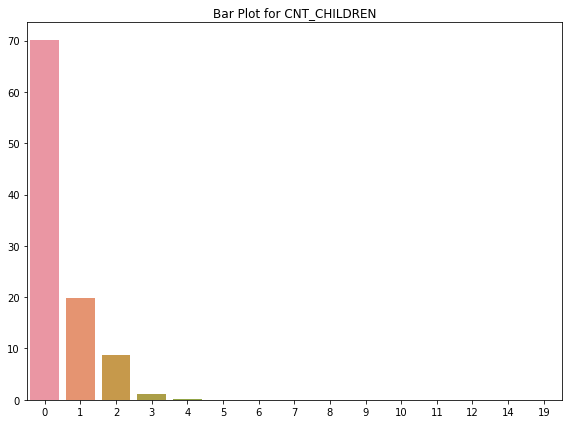

In [167]:
# Overall % of Loans where Applicants have children
plot_bar('CNT_CHILDREN')

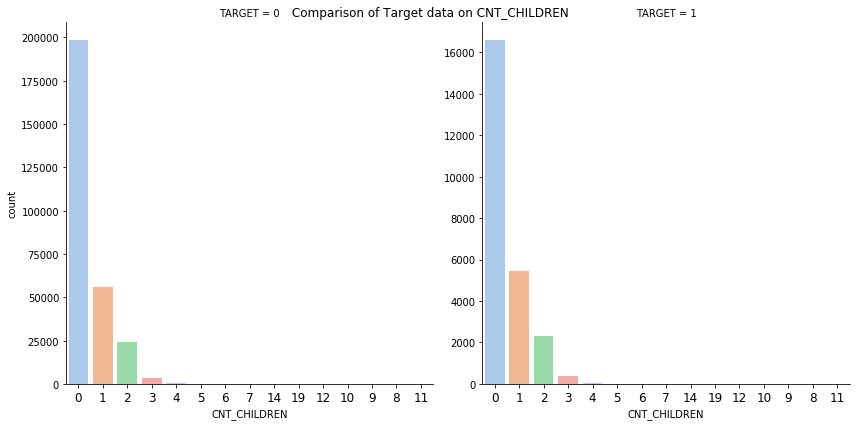

In [168]:
# comparison of Loans where Appliants have children for Defaulters and Non-Defaulters
plotting('CNT_CHILDREN', p='pastel')

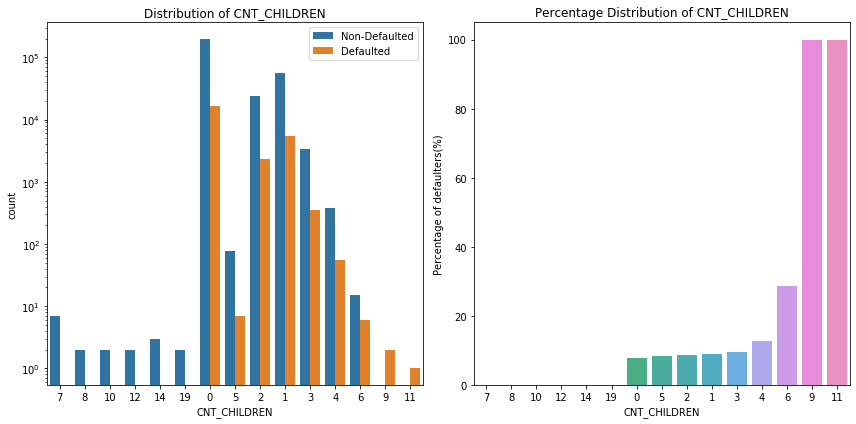

In [169]:
plot_comparison_charts('CNT_CHILDREN', ylog=True)

- Most of the applicants have no children. There are negligible loans for applicants with more than 3 children
- Applicants with number of children > 9, have defaulted loans

---

#### Bivariate Analysis

In [170]:
# separate dataframes for Defaulted Loans and Non-Defaulted Loans for side-by-side comparison
defaulted_loans = app_data[app_data['TARGET'] == 1]
non_defaulted_loans = app_data[app_data['TARGET'] == 0]

In [171]:
# function to create charts for Bivariate Analysis

def bivariate_box_charts(x, y, hue, title, rotate_ticks=False):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 15))

    # first chart will have data from Non-defaulted loans
    c1 = sns.boxplot(ax=ax1, data=non_defaulted_loans, x=x, y=y, hue=hue)
    ax1.set_title(f'{title} of Non-Defaulted Loans')
    
    # second chart will have data from Defaulted loans
    c2 = sns.boxplot(ax=ax2, data=defaulted_loans, x=x, y=y, hue=hue)
    ax2.set_title(f'{title} of Defaulted Loans')
    
    if rotate_ticks:
        plt.setp(ax1.get_xticklabels() + ax2.get_xticklabels(), rotation=30, ha='right')

    plt.tight_layout()
#     plt.savefig(f'charts/plot_bivariate_box_{x}_{y}.png')
    plt.show()

In [172]:
# function to create charts for Bivariate Analysis

def bivariate_bar_charts(x, y, hue, title, rotate_ticks=False):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 15))

    # first chart will have data from Non-defaulted loans
    c1 = sns.barplot(ax=ax1, data=non_defaulted_loans, x=x, y=y, hue=hue)
    ax1.set_title(f'{title} of Non-Defaulted Loans')
    
    # second chart will have data from Defaulted loans
    c2 = sns.barplot(ax=ax2, data=defaulted_loans, x=x, y=y, hue=hue)
    ax2.set_title(f'{title} of Defaulted Loans')
    
    if rotate_ticks:
        plt.setp(ax1.get_xticklabels() + ax2.get_xticklabels(), rotation=30, ha='right')

    plt.tight_layout()
#     plt.savefig(f'charts/plot_bivariate_bar_{x}_{y}.png')
    plt.show()

##### 5.1.21 Credit Amount vs Education

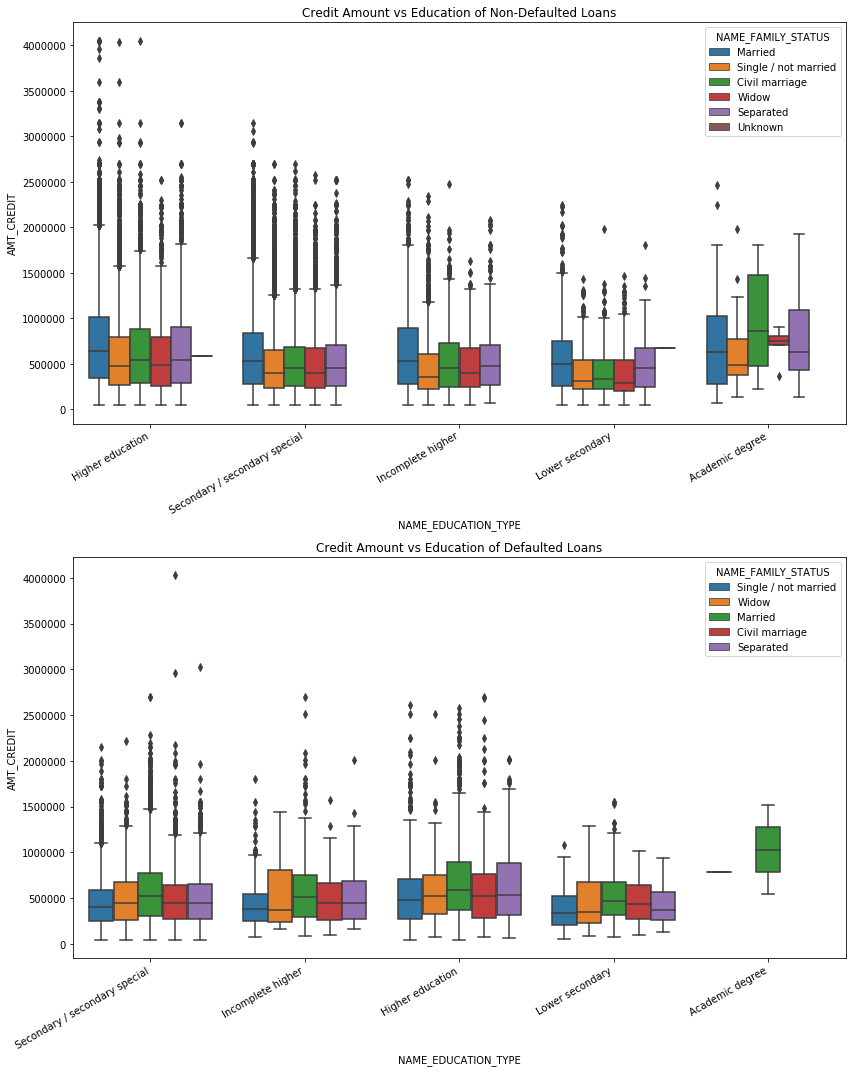

In [173]:
# box plots
bivariate_box_charts(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS',\
                     title='Credit Amount vs Education', rotate_ticks=True)

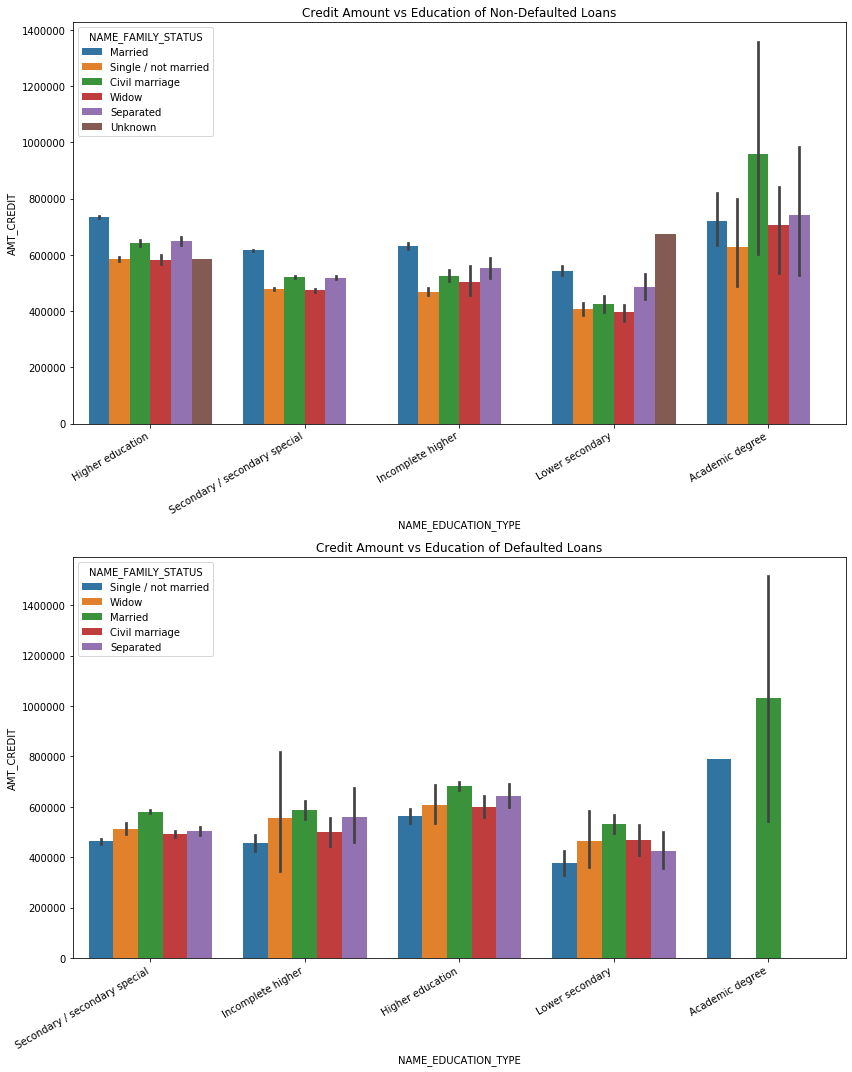

In [174]:
# bar charts
bivariate_bar_charts(x='NAME_EDUCATION_TYPE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS',\
                     title='Credit Amount vs Education', rotate_ticks=True)

From the above charts, we can conclude the following:
 1. Married Applicants holding Academic degree have a higher Credit Amount (Defaulted and Non-Defaulted Loans)
 2. Overall Academic degree Applicants have highest Credit Amount
 3. Defaulted Loans are mostly of Married categories across Education type

##### 5.1.22 Income Range Vs Credit Amount

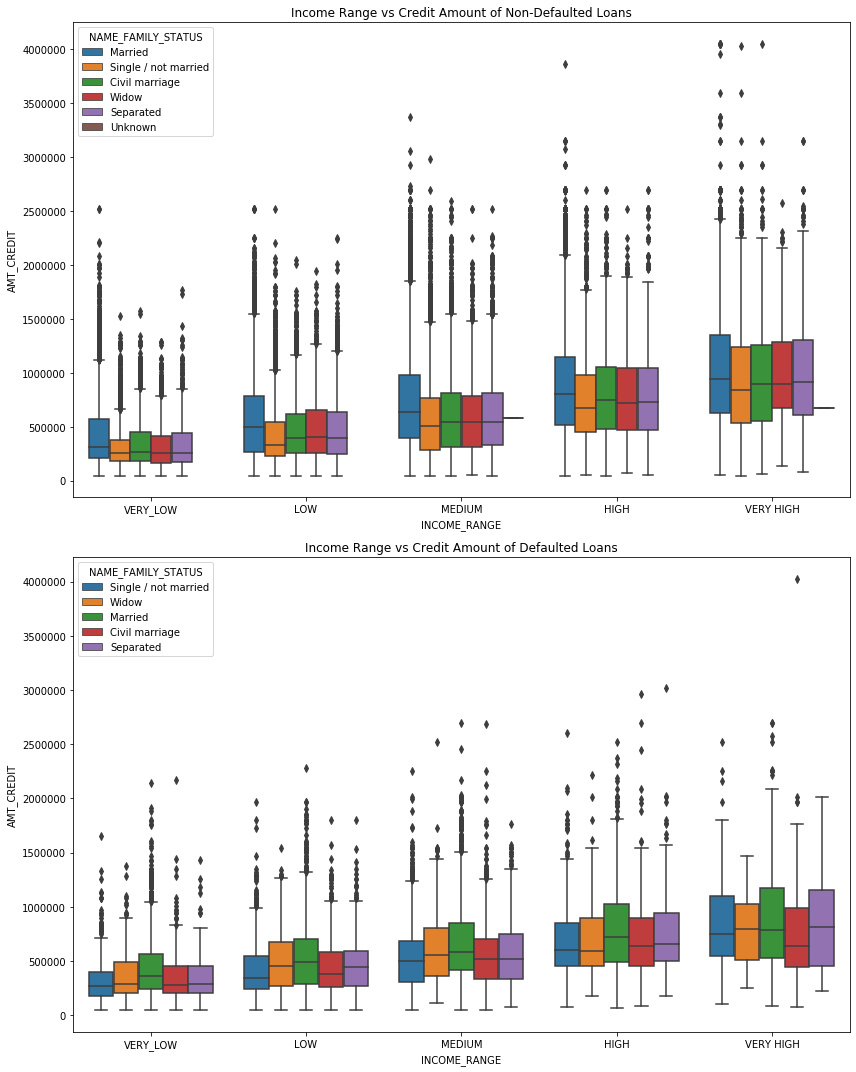

In [175]:
# box charts
bivariate_box_charts(x='INCOME_RANGE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS', title='Income Range vs Credit Amount')

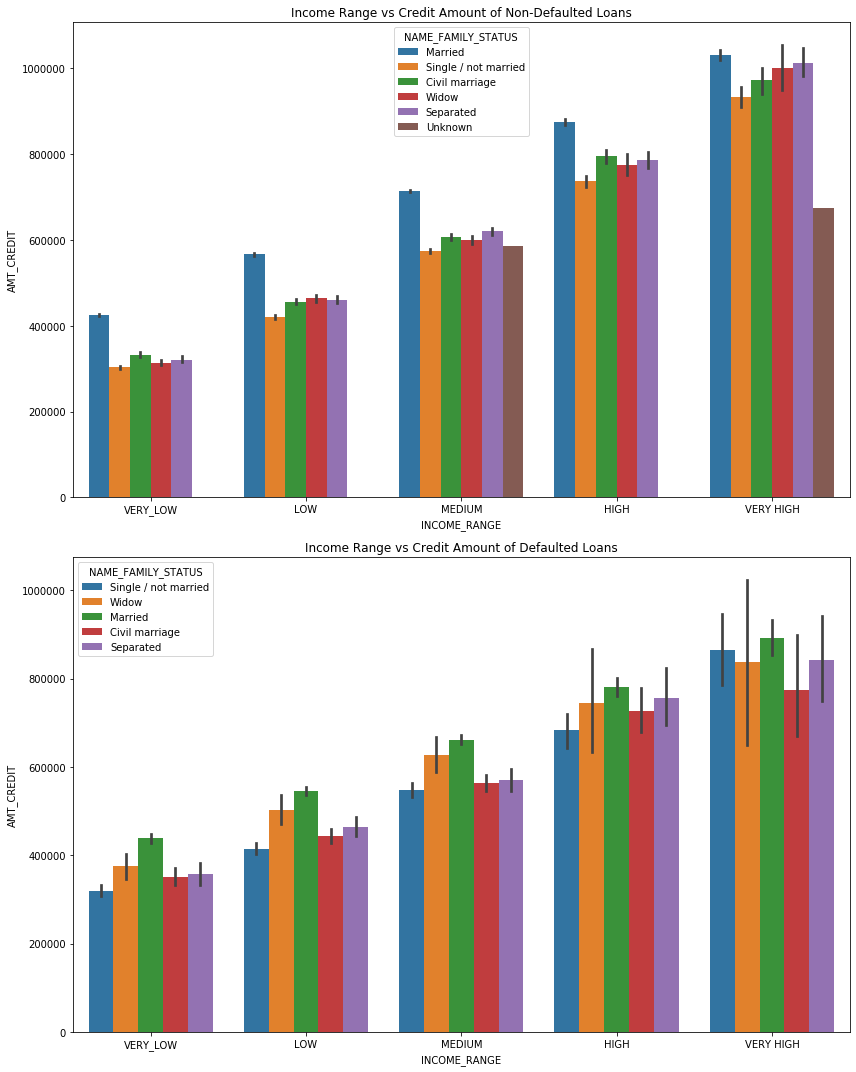

In [176]:
# bar charts
bivariate_bar_charts(x='INCOME_RANGE', y='AMT_CREDIT', hue='NAME_FAMILY_STATUS', title='Income Range vs Credit Amount')

From the above charts, we can conclude the following:
 1. There is a correlation between Income Ranges and Amount Credited. Higher the Income, higher the amount credited.
 2. Defaulted Loans are mostly of Married categories across Income Ranges

#### Bivariate Analysis of Numeric - Numeric data

In [177]:
app_data.select_dtypes('int64').columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE',
       'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'CNT_FAM_MEMBERS', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'DAYS_LAST_PHONE_CHANGE'],
      dtype='object')

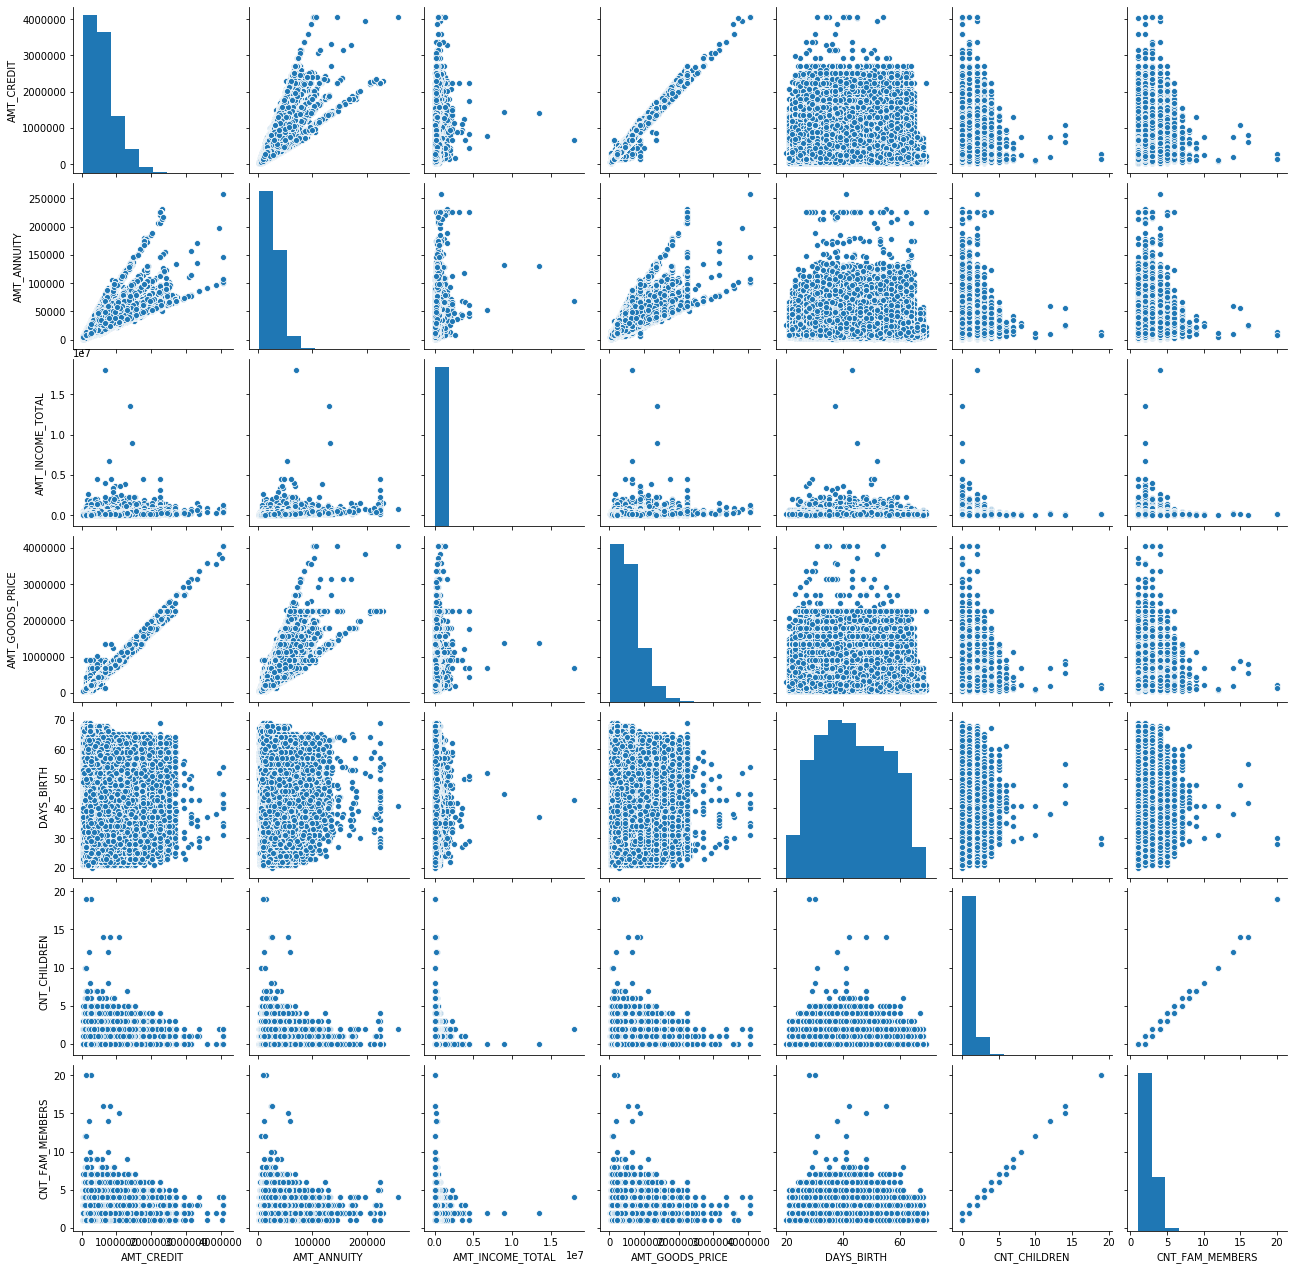

In [178]:
# pairplots for Target=0 (Non-Defaulted)
pair = non_defaulted_loans[["AMT_CREDIT", "AMT_ANNUITY", "AMT_INCOME_TOTAL", "AMT_GOODS_PRICE", "DAYS_BIRTH", "CNT_CHILDREN", "CNT_FAM_MEMBERS"]]
sns.pairplot(pair)
plt.show()

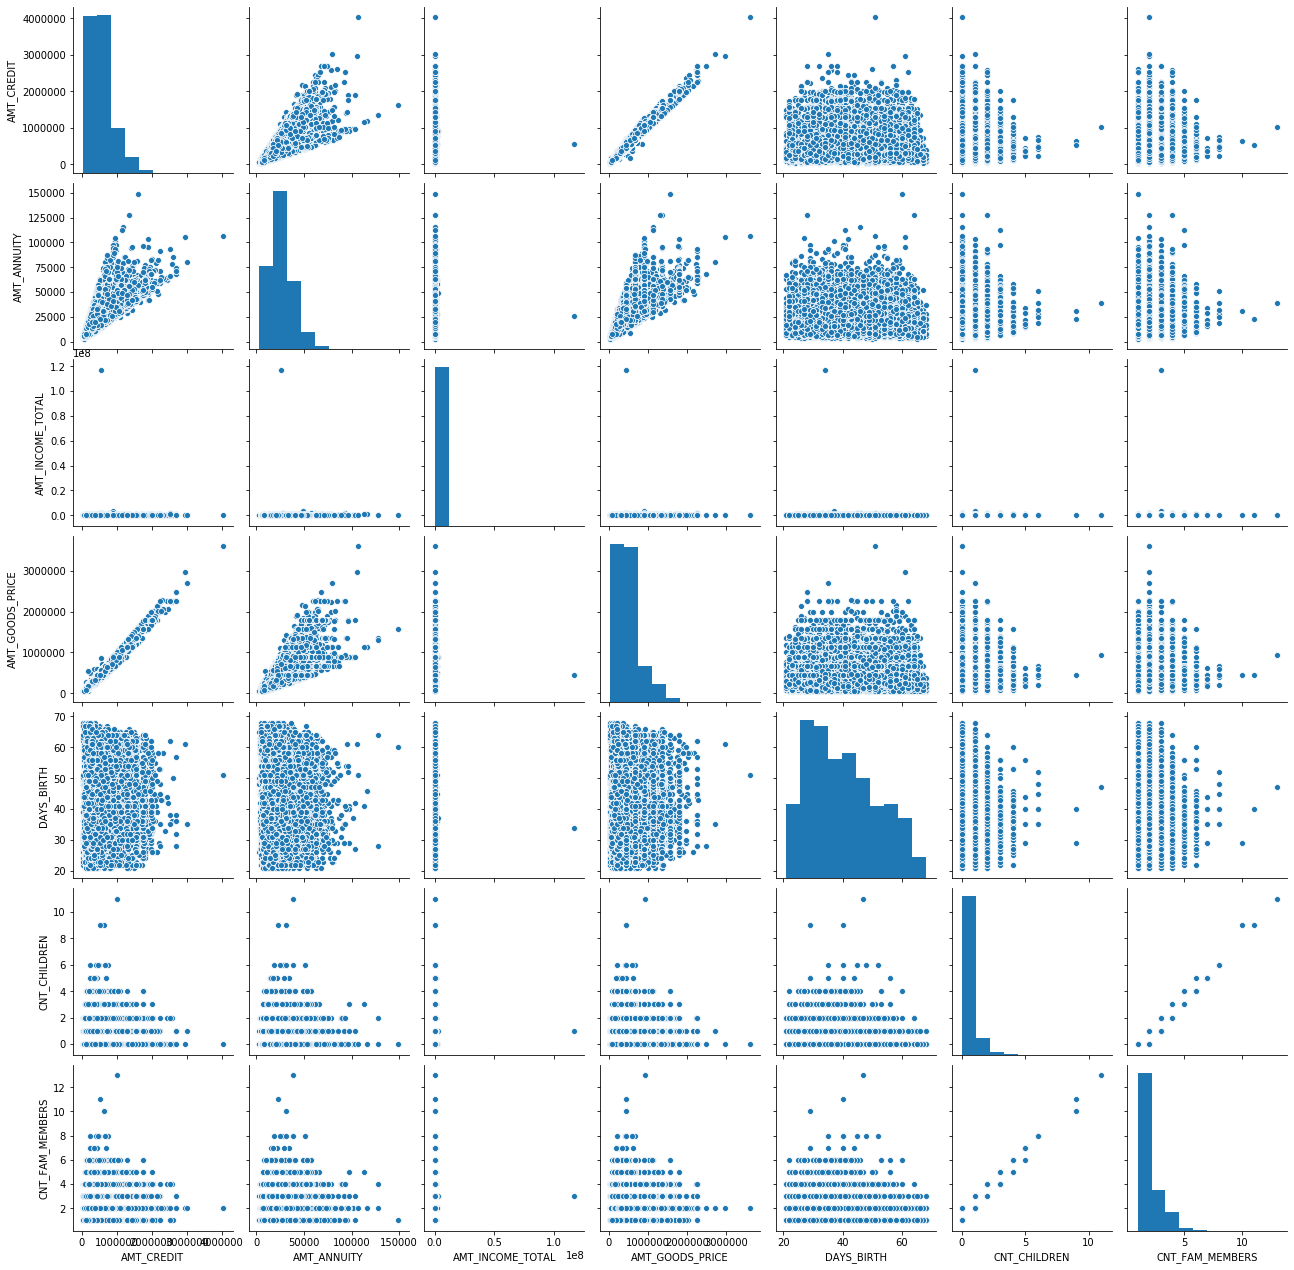

In [179]:
 # pairplots for Target=1 (Defaulted)
pair = defaulted_loans[["AMT_CREDIT", "AMT_ANNUITY", "AMT_INCOME_TOTAL", "AMT_GOODS_PRICE", "DAYS_BIRTH", "CNT_CHILDREN", "CNT_FAM_MEMBERS"]]
sns.pairplot(pair)
plt.show()

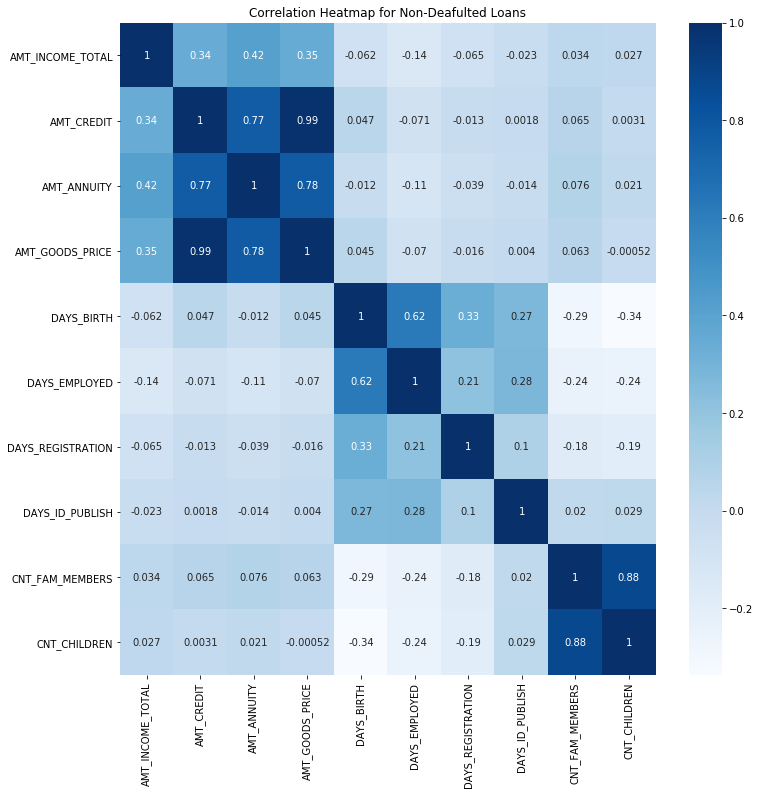

In [180]:
# heatmap for Target=0 (Non-Defaulted)
corr = non_defaulted_loans[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.title("Correlation Heatmap for Non-Deafulted Loans")
plt.show()

The top 10 correlations for non defaulted loans are:
- AMT_CREDIT & AMT_GOODS_PRICE 
- CNT_FAM_MEMBERS & CNT_CHILDREN 
- AMT_GOODS_PRICE  & AMT_ANNUITY 
- AMT_ANNUITY & AMT_CREDIT 
- DAYS_EMPLOYED & DAYS_BIRTH 
- AMT_INCOME_TOTAL  & AMT_ANNUITY 
- AMT_INCOME_TOTAL &  AMT_GOODS_PRICE
- AMT_INCOME_TOTAL  & AMT_CREDIT
- DAYS_REGISTRATION  & DAYS_BIRTH
- DAYS_EMPLOYED & DAYS_ID_PUBLISH

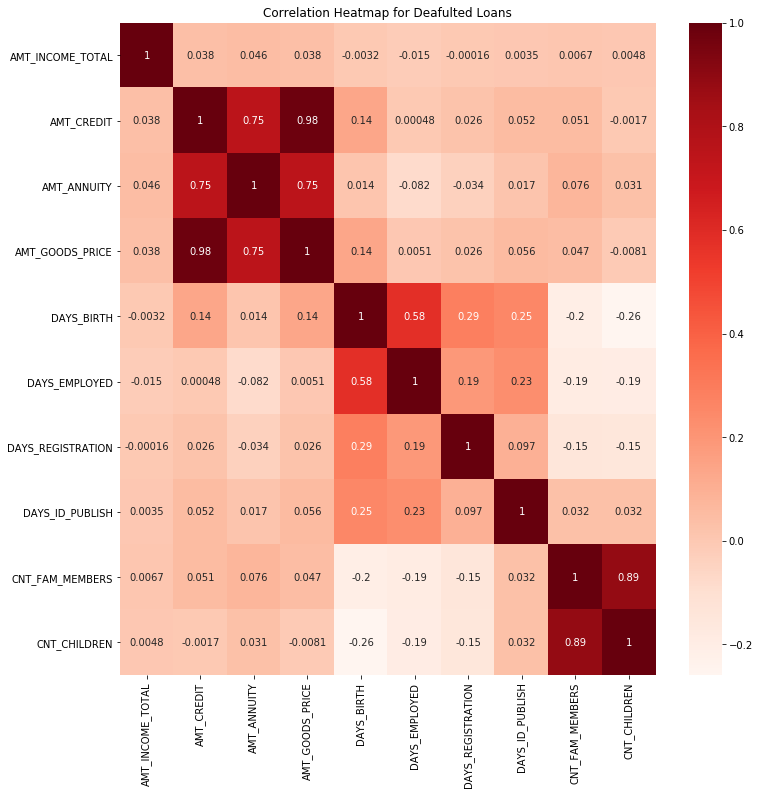

In [181]:
# heatmap for Target=1 (Defaulted)
corr = defaulted_loans[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'CNT_FAM_MEMBERS', 'CNT_CHILDREN']].corr()
plt.figure(figsize=(12,12))
sns.heatmap(corr, annot=True, cmap='Reds')
plt.title("Correlation Heatmap for Deafulted Loans")
plt.show()

The top 10 correlations for defaulted loans are:

- AMT_CREDIT &   AMT_GOODS_PRICE 
- CNT_FAM_MEMBERS  &  CNT_CHILDREN 
- AMT_GOODS_PRICE &    AMT_ANNUITY 
- AMT_ANNUITY  &  AMT_CREDIT 
- DAYS_EMPLOYED & DAYS_BIRTH 
- DAYS_REGISTRATION & DAYS_BIRTH
- DAYS_ID_PUBLISH & DAYS_BIRTH
- DAYS_ID_PUBLISH & DAYS_EMPLOYED
- DAYS_REGISTRATION & DAYS_EMPLOYED
- DAYS_ID_PUBLISH & DAYS_REGISTRATION

Strong Correlation Findings:
1. Amount Credited and Goods Price
2. Count Family Members and Count Children
3. Amount Annuity and Amount Credit

#### 5.2 Previous Application Data

In [182]:
# merge Target value from application_data to prev_application_data and carry on with Analysis
app_data_sub = app_data[['SK_ID_CURR', 'TARGET']]
app_data_sub

SK_ID_CURR  TARGET
0           100002       1
1           100003       0
2           100004       0
3           100006       0
4           100007       0
...            ...     ...
307506      456251       0
307507      456252       0
307508      456253       0
307509      456254       1
307510      456255       0

[307511 rows x 2 columns]

In [183]:
app_data_merged = app_data_sub.merge(prev_data, on='SK_ID_CURR', how='inner')
app_data_merged.head()

SK_ID_CURR  TARGET  SK_ID_PREV NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0      100002       1     1038818     Consumer loans     9251.775   
1      100003       0     1810518         Cash loans    98356.995   
2      100003       0     2636178     Consumer loans    64567.665   
3      100003       0     2396755     Consumer loans     6737.310   
4      100004       0     1564014     Consumer loans     5357.250   

   AMT_APPLICATION  AMT_CREDIT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0         179055.0    179055.0         179055.0                   SATURDAY   
1         900000.0   1035882.0         900000.0                     FRIDAY   
2         337500.0    348637.5         337500.0                     SUNDAY   
3          68809.5     68053.5          68809.5                   SATURDAY   
4          24282.0     20106.0          24282.0                     FRIDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                        9                           Y   
1                       12                           Y   
2                       17                           Y   
3                       15                           Y   
4                        5                           Y   

   NFLAG_LAST_APPL_IN_DAY NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                       1                    XAP             Approved   
1                       1                    XNA             Approved   
2                       1                    XAP             Approved   
3                       1                    XAP             Approved   
4                       1                    XAP             Approved   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON NAME_TYPE_SUITE  \
0           -606                    XNA                XAP   Unaccompanied   
1           -746                    XNA                XAP   Unaccompanied   
2           -828  Cash through the bank                XAP          Family   
3          -2341  Cash through the bank                XAP          Family   
4           -815  Cash through the bank                XAP   Unaccompanied   

  NAME_CLIENT_TYPE   NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0              New              Vehicles            POS               XNA   
1         Repeater                   XNA           Cash            x-sell   
2        Refreshed             Furniture            POS               XNA   
3        Refreshed  Consumer Electronics            POS               XNA   
4              New                Mobile            POS               XNA   

              CHANNEL_TYPE  SELLERPLACE_AREA  NAME_SELLER_INDUSTRY  \
0                    Stone               500       Auto technology   
1  Credit and cash offices                -1                   XNA   
2                    Stone              1400             Furniture   
3             Country-wide               200  Consumer electronics   
4         Regional / Local                30          Connectivity   

   CNT_PAYMENT NAME_YIELD_GROUP          PRODUCT_COMBINATION  \
0         24.0       low_normal      POS other with interest   
1         12.0       low_normal             Cash X-Sell: low   
2          6.0           middle   POS industry with interest   
3         12.0           middle  POS household with interest   
4          4.0           middle  POS mobile without interest   

   DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
0            365243.0          -565.0                      125.0   
1            365243.0          -716.0                     -386.0   
2            365243.0          -797.0                     -647.0   
3            365243.0         -2310.0                    -1980.0   
4            365243.0          -784.0                     -694.0   

   DAYS_LAST_DUE  DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
0          -25.0             -17.0                        0.0  
1         -536.0            -527.0                      

##### 5.2.1 Contract Status

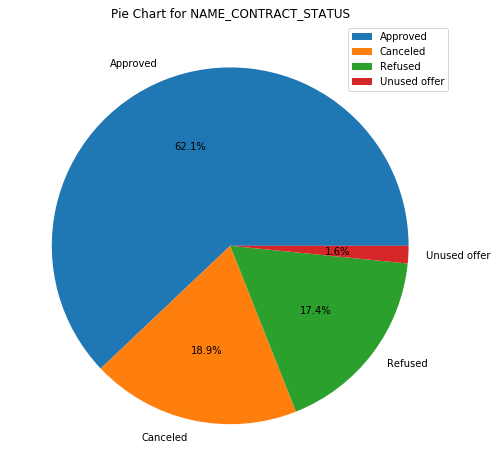

In [184]:
plot_pie('NAME_CONTRACT_STATUS', df=prev_data)

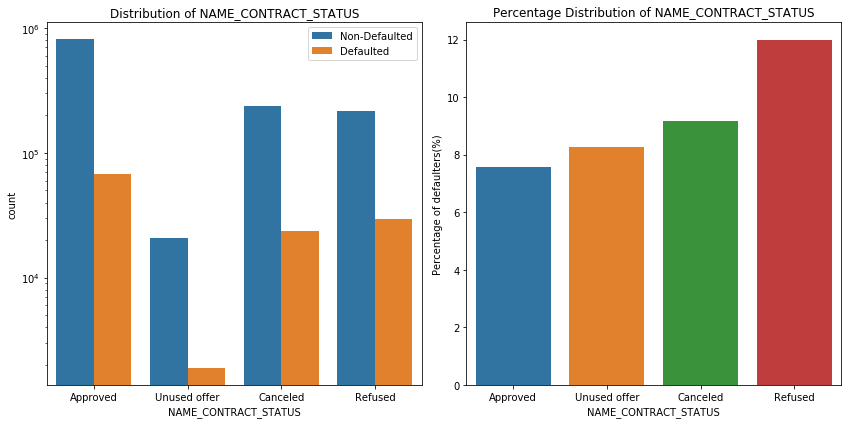

In [185]:
plot_comparison_charts('NAME_CONTRACT_STATUS', ylog=True, df=app_data_merged)

Observations:
1. Majority of loans are approved
2. Canceled and Refused loans status have more Defaulters

##### 5.2.2 Weekday of Loan Application

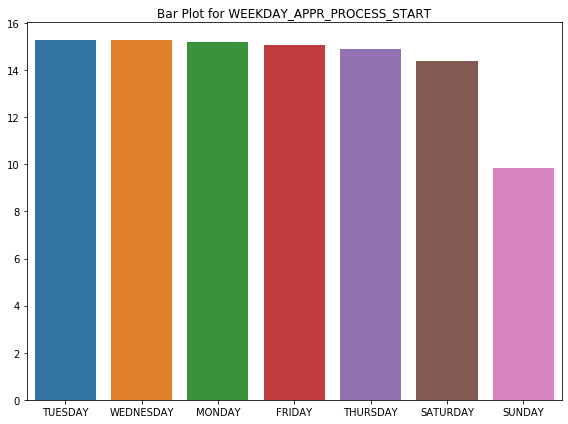

In [186]:
plot_bar('WEEKDAY_APPR_PROCESS_START', df=prev_data)

Weekends have the lowest applications

##### 5.2.3 Payment Method

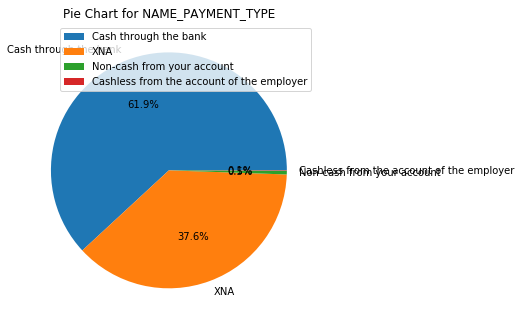

In [187]:
plot_pie('NAME_PAYMENT_TYPE', df=prev_data)

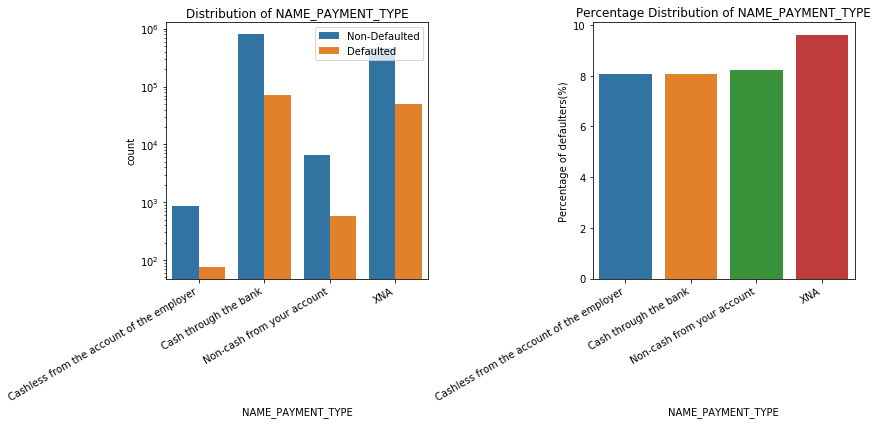

In [188]:
plot_comparison_charts('NAME_PAYMENT_TYPE', df=app_data_merged, rotate_xticks=True, ylog=True)

Majority of the loans have Payment Type - Cash through the bank

##### 5.2.4 Reason of Rejection

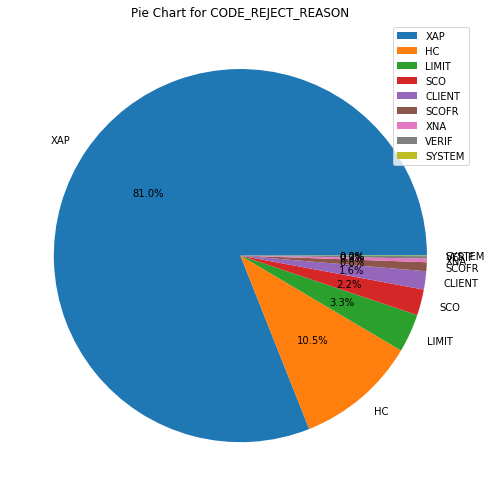

In [189]:
plot_pie('CODE_REJECT_REASON', df=prev_data)

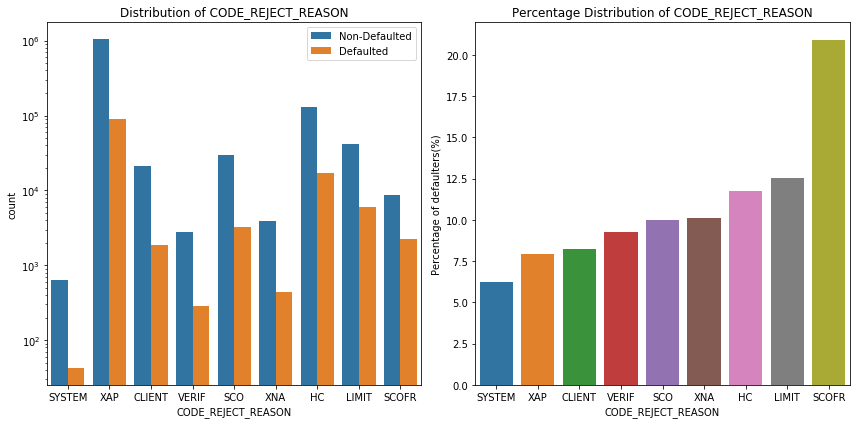

In [190]:
plot_comparison_charts('CODE_REJECT_REASON', df=app_data_merged, ylog=True)

Observations:
1. 'SCOFR' has the highest percentage for Reject Reason
2. 'XAP' has the highest overall percentage

##### 5.2.5 Portfolio

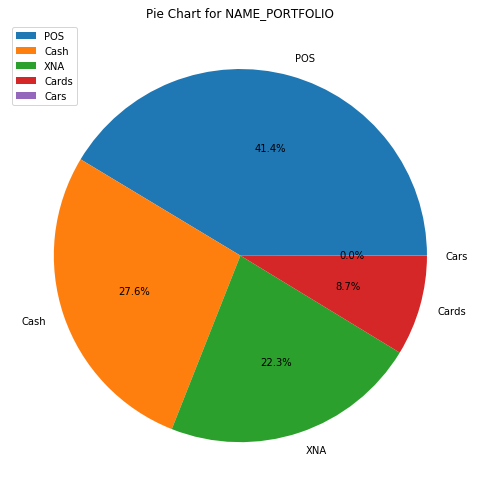

In [191]:
plot_pie('NAME_PORTFOLIO', prev_data)

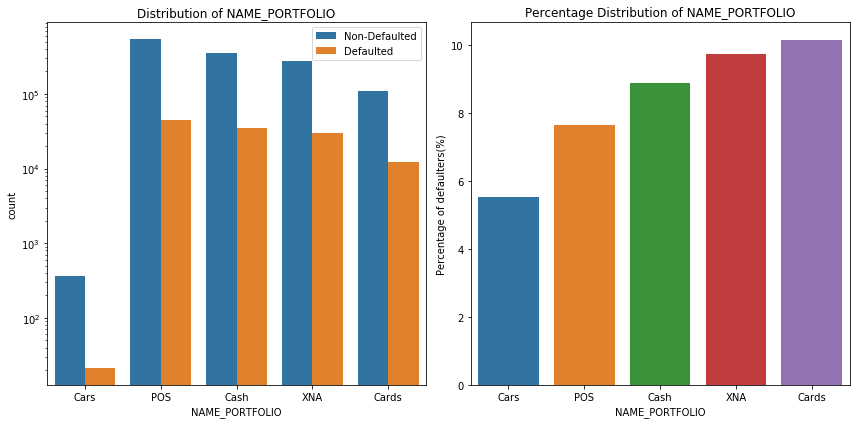

In [192]:
plot_comparison_charts('NAME_PORTFOLIO', df=app_data_merged, ylog=True)

Observations:
1. 'POS' and 'Cash' lead the Portfolio metric
2. 'Cards' category has the highest Rejection percentage

##### 5.2.6 Client Type

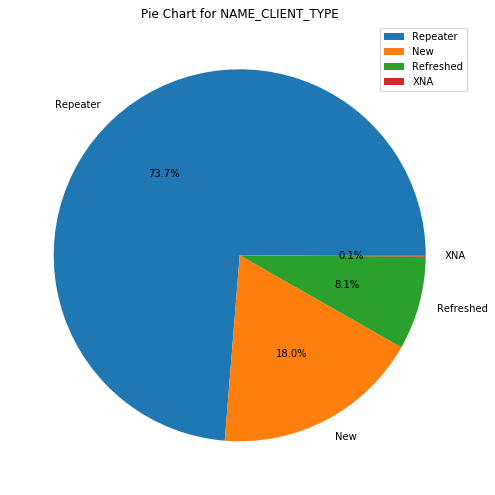

In [193]:
plot_pie('NAME_CLIENT_TYPE', df=prev_data)

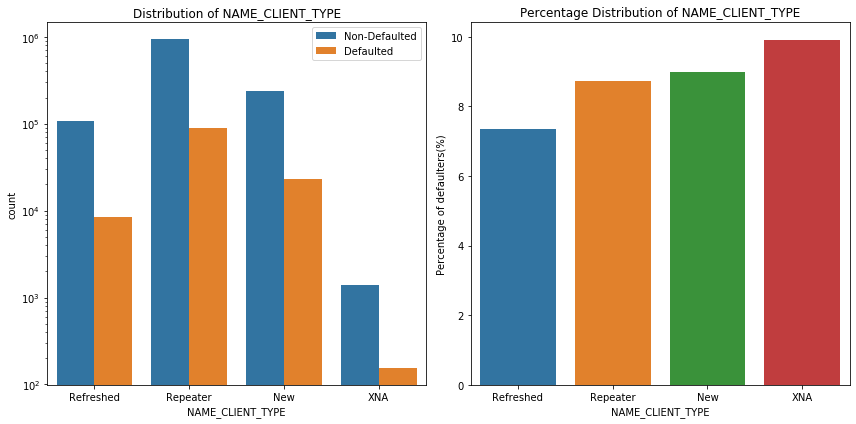

In [194]:
plot_comparison_charts('NAME_CLIENT_TYPE', df=app_data_merged, ylog=True)

Observations:
1. Majority of the Clients are Repeater.
2. Refreshed client types have lowest rejection percentage

##### 5.2.7 Amount Credit

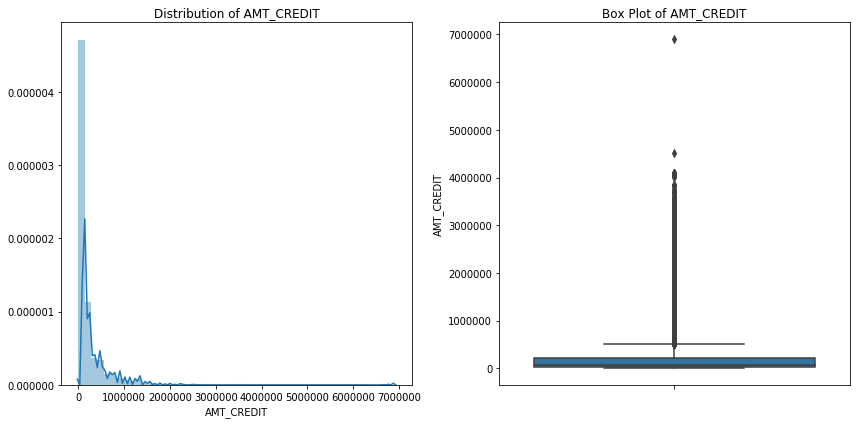

In [195]:
plot_dist_charts('AMT_CREDIT', df=prev_data)

We can see there are Outliers which makes the data highly skewed. But these records are valid as people can get a higher loans.

 1. We can ignore these records from our analysis
 2. We can cap the higher records to 99 percentile value

##### 5.2.8 AMT_ANNUITY

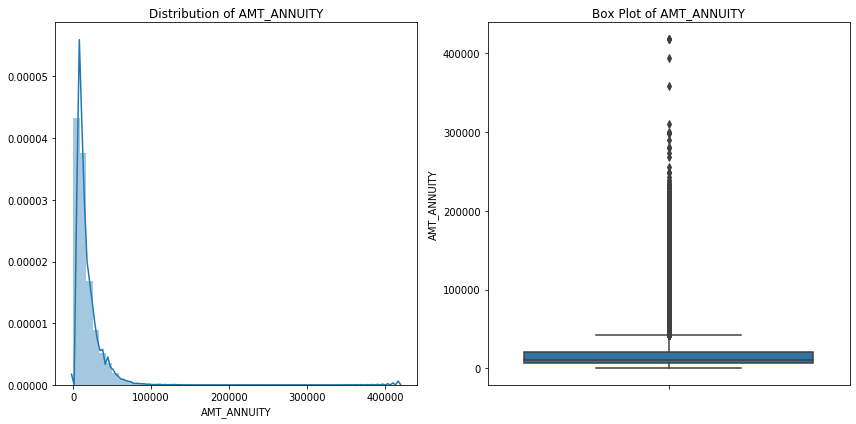

In [196]:
plot_dist_charts('AMT_ANNUITY', df=prev_data)

We can see there are Outliers which makes the data highly skewed. But these records are valid as people can get a higher loans.

 1. We can ignore these records from our analysis
 2. We can cap the higher records to 99 percentile value

##### 5.2.9 AMT_GOODS_PRICE

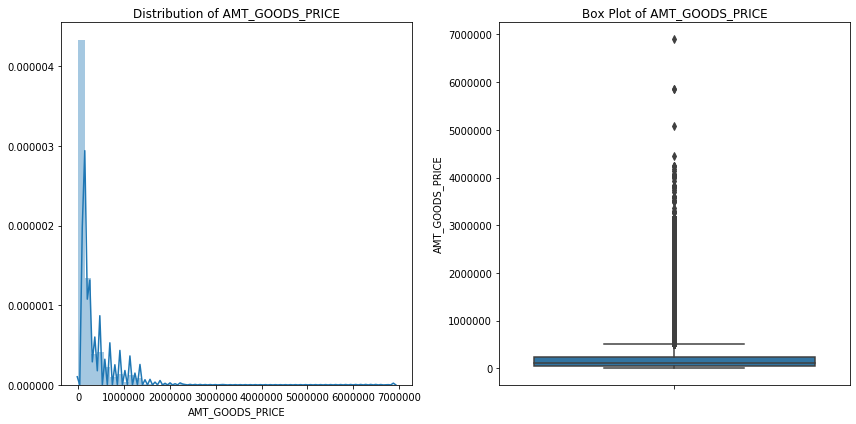

In [197]:
plot_dist_charts('AMT_GOODS_PRICE', df=prev_data)

We can see there are Outliers which makes the data highly skewed. But these records are valid as people can get a higher loans.

 1. We can ignore these records from our analysis
 2. We can cap the higher records to 99 percentile value

---